# Praktični deo - Izbor atributa (feature selection)

## 1. Učitavanje podataka

In [1]:
import numpy as np
import pandas as pd
import warnings

df = pd.read_csv("/Users/milicamilutinovic/ml_feature_selection/data/uci-secom.csv")

df.sample(n=5)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
958,2008-09-20 15:46:00,3037.98,2370.44,2168.7333,999.5929,1.3739,100.0,104.8544,0.1217,1.4938,...,NaN,0.5028,0.0156,0.0038,3.1034,0.0260,0.0268,0.0068,103.3520,-1
381,2008-08-21 20:37:00,2957.88,2560.91,2196.8000,1090.0084,1.3270,100.0,99.3944,0.1212,1.4604,...,NaN,0.4988,0.0139,0.0036,2.7823,0.0165,0.0318,0.0102,192.9130,-1
1456,2008-11-10 06:56:00,3026.86,2497.62,2306.1000,0.0000,1112.4728,100.0,88.4722,0.0000,1.4460,...,545.6838,0.5045,0.0108,0.0026,2.1370,-0.0031,0.0168,0.0061,545.6838,-1
537,2008-08-29 14:18:00,2971.23,2626.13,2183.3444,1111.4499,1.5548,100.0,97.5311,0.1236,1.3906,...,NaN,0.5008,0.0154,0.0046,3.0695,-0.0012,0.0252,0.0081,0.0000,-1
429,2008-08-23 02:04:00,3120.68,2396.40,2177.0222,1448.8499,1.5565,100.0,103.2567,0.1232,1.4920,...,NaN,0.4975,0.0140,0.0036,2.8098,0.0142,0.0156,0.0044,109.5996,-1


## 2. Osnovna analiza

In [2]:
print(f"Dimenzije: {df.shape}")
print(f"Broj uzoraka: {df.shape[0]}")
print(f"Broj kolona: {df.shape[1]}")

Dimenzije: (1567, 592)
Broj uzoraka: 1567
Broj kolona: 592


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), str(1)
memory usage: 7.1 MB


In [4]:
df.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

Skup podataka sadrži 1567 uzoraka i 592 atributa, što ga svrstava u visokodimenzionalne skupove podataka. Poseban izazov predstavlja veliki broj nedostajućih vrednosti i izrazita nebalansiranost ciljne promenljive.

In [5]:
print(df['Pass/Fail'].value_counts())
print("\nProcenat:")
print(df['Pass/Fail'].value_counts(normalize=True) * 100)

Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64

Procenat:
Pass/Fail
-1    93.363114
 1     6.636886
Name: proportion, dtype: float64


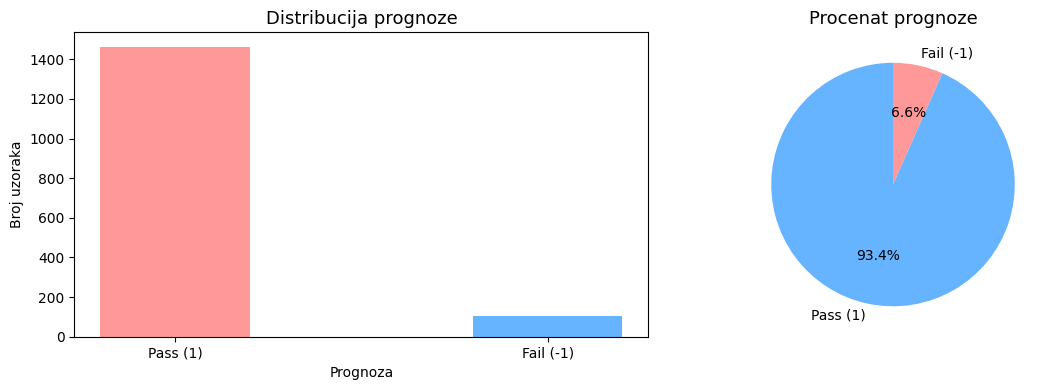

Odnos klasa (min - max): 0.07
Dataset je nebalansiran


In [6]:
import matplotlib.pyplot as plt

# kreiranje figure sa dva subplot-a
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# bar chart, broj uzoraka po klasi
counts = df['Pass/Fail'].value_counts()

axes[0].bar(
    counts.index,
    counts.values,
    color=['#ff9999', '#66b3ff']
)
axes[0].set_title('Distribucija prognoze', fontsize=13)
axes[0].set_xlabel('Prognoza')
axes[0].set_ylabel('Broj uzoraka')
axes[0].set_xticks(counts.index)
axes[0].set_xticklabels(['Pass (1)', 'Fail (-1)'])

# pie chart procentualna zastupljenost
axes[1].pie(
    counts.values,
    labels=['Pass (1)', 'Fail (-1)'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999']
)
axes[1].set_title('Procenat prognoze', fontsize=13)

plt.tight_layout()
plt.show()

# odnos najmanje i najvece klase
class_ratio = counts.min() / counts.max()

print(f"Odnos klasa (min - max): {class_ratio:.2f}")

if class_ratio >= 0.4:
    print("Dataset je dovoljno balansiran nije potrebna dodatna obrada.")
else:
    print("Dataset je nebalansiran")


In [7]:
imbalance_ratio = counts.max() / counts.min()
print(f"Imbalance ratio: {imbalance_ratio:.2f}")

Imbalance ratio: 14.07


Odnos većinske i manjinske klase iznosi približno 14:1, što ukazuje na potrebu za korišćenjem metrika kao što su ROC-AUC i Average Precision umesto same tačnosti.

## 3. Priprema podataka

In [8]:
# uklanjanje kolona koje su potpuno prazne 
df = df.dropna(axis=1, how='all')

# ukloni Time kolonu (nije feature)
if 'Time' in df.columns:
    df = df.drop(columns=['Time'])
    print("Kolona 'Time' uklonjena")


# razdvajanje atributa i ciljne promenljive
X = df.drop(columns=['Pass/Fail'])
y = df['Pass/Fail'].map({-1: 0, 1: 1})




print(f"\nDimenzije atributa (X): {X.shape}")
print(f"Dimenzije ciljne promenljive (y): {y.shape}")

print("\nEnkodovanje ciljne promenljive:")
print("Pass (-1) -> 0")
print("Fail (1)  -> 1")

print("\nLista atributa:")
for i, col in enumerate(X.columns, start=1):
    print(f"{i:02d}. {col}")

print("\nDeskriptivna statistika atributa:")
print(X.describe())


Kolona 'Time' uklonjena

Dimenzije atributa (X): (1567, 590)
Dimenzije ciljne promenljive (y): (1567,)

Enkodovanje ciljne promenljive:
Pass (-1) -> 0
Fail (1)  -> 1

Lista atributa:
01. 0
02. 1
03. 2
04. 3
05. 4
06. 5
07. 6
08. 7
09. 8
10. 9
11. 10
12. 11
13. 12
14. 13
15. 14
16. 15
17. 16
18. 17
19. 18
20. 19
21. 20
22. 21
23. 22
24. 23
25. 24
26. 25
27. 26
28. 27
29. 28
30. 29
31. 30
32. 31
33. 32
34. 33
35. 34
36. 35
37. 36
38. 37
39. 38
40. 39
41. 40
42. 41
43. 42
44. 43
45. 44
46. 45
47. 46
48. 47
49. 48
50. 49
51. 50
52. 51
53. 52
54. 53
55. 54
56. 55
57. 56
58. 57
59. 58
60. 59
61. 60
62. 61
63. 62
64. 63
65. 64
66. 65
67. 66
68. 67
69. 68
70. 69
71. 70
72. 71
73. 72
74. 73
75. 74
76. 75
77. 76
78. 77
79. 78
80. 79
81. 80
82. 81
83. 82
84. 83
85. 84
86. 85
87. 86
88. 87
89. 88
90. 89
91. 90
92. 91
93. 92
94. 93
95. 94
96. 95
97. 96
98. 97
99. 98
100. 99
101. 100
102. 101
103. 102
104. 103
105. 104
106. 105
107. 106
108. 107
109. 108
110. 109
111. 110
112. 111
113. 112
114. 113


## Exploratory Data Analysis (EDA)

### Univariate Analysis

/Users/milicamilutinovic/ml_feature_selection/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3023: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/milicamilutinovic/ml_feature_selection/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3024: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Prikazani atributi (Top 5 po apsolutnoj korelaciji sa targetom):
59     0.155796
103    0.151203
510    0.131593
348    0.130180
158    0.121258
dtype: float64


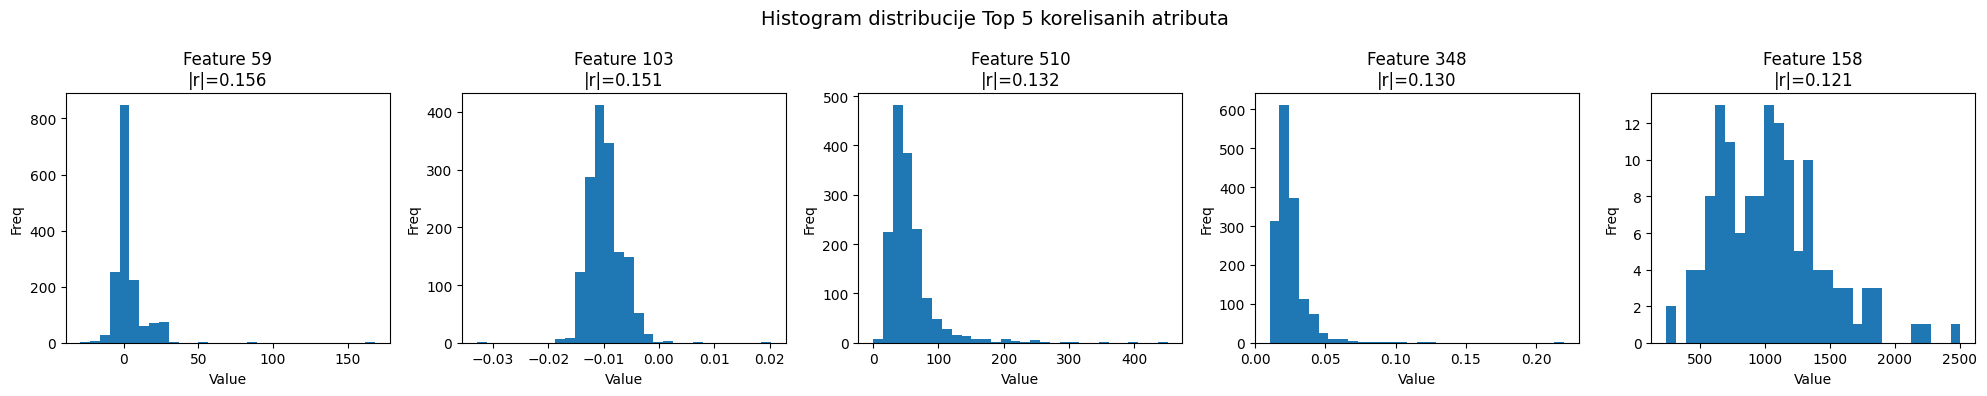

In [9]:
# uklanjanje feature sa nultom varijancom
X_clean = X.loc[:, X.std() > 0]

corr_with_target = X_clean.corrwith(y).abs()
top5_features = corr_with_target.sort_values(ascending=False).head(5)

# izracunavanje korelacije sa targetom
corr_with_target = X.corrwith(y).abs()

top5_features = corr_with_target.sort_values(ascending=False).head(5)

print("Prikazani atributi (Top 5 po apsolutnoj korelaciji sa targetom):")
print(top5_features)


fig, axes = plt.subplots(1, len(top5_features), figsize=(20,4))

for i, col in enumerate(top5_features.index):
    axes[i].hist(X[col], bins=30)
    axes[i].set_title(f"Feature {col}\n|r|={top5_features[col]:.3f}")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Freq")

plt.suptitle("Histogram distribucije Top 5 korelisanih atributa", fontsize=14)
plt.tight_layout()
plt.show()

Histogrami pokazuju da su distribucije atributa izrazito asimetrične sa prisustvom outliera. Korelacione vrednosti su relativno niske (|r| < 0.16), što ukazuje da pojedinačni atributi nemaju snažnu linearnu vezu sa ciljnom promenljivom. Ovo sugeriše da diskriminativna informacija nije koncentrisana u jednom atributu, već raspoređena kroz više senzorskih signala.

### Bivariate analysis

/Users/milicamilutinovic/ml_feature_selection/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3023: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/milicamilutinovic/ml_feature_selection/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3024: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Top 3 atributa po korelaciji:
59     0.155796
103    0.151203
510    0.131593
dtype: float64


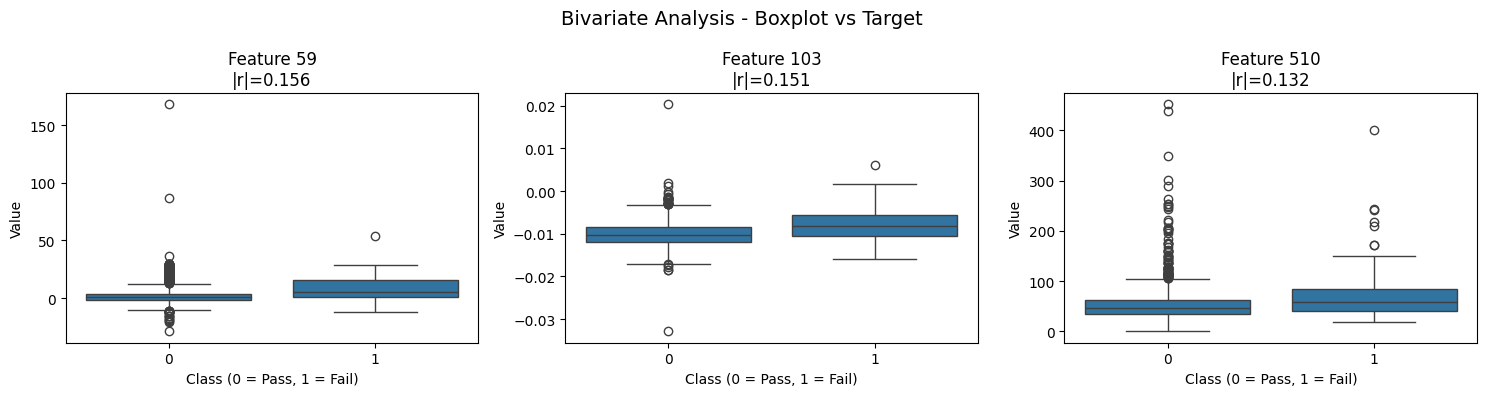

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_with_target = X.corrwith(y).abs()
top3_features = corr_with_target.sort_values(ascending=False).head(3)

print("Top 3 atributa po korelaciji:")
print(top3_features)

fig, axes = plt.subplots(1, 3, figsize=(15,4))

for i, col in enumerate(top3_features.index):
    sns.boxplot(x=y, y=X[col], ax=axes[i])
    axes[i].set_title(f"Feature {col}\n|r|={top3_features[col]:.3f}")
    axes[i].set_xlabel("Class (0 = Pass, 1 = Fail)")
    axes[i].set_ylabel("Value")

plt.suptitle("Bivariate Analysis - Boxplot vs Target", fontsize=14)
plt.tight_layout()
plt.show()

Boxplot analiza pokazuje pomeranje medijana između PASS i FAIL klasa, ali uz značajno preklapanje distribucija. Ovo ukazuje na postojanje diskriminativne informacije, ali i na visoku varijabilnost unutar klasa, što otežava klasifikaciju

### Density Plot

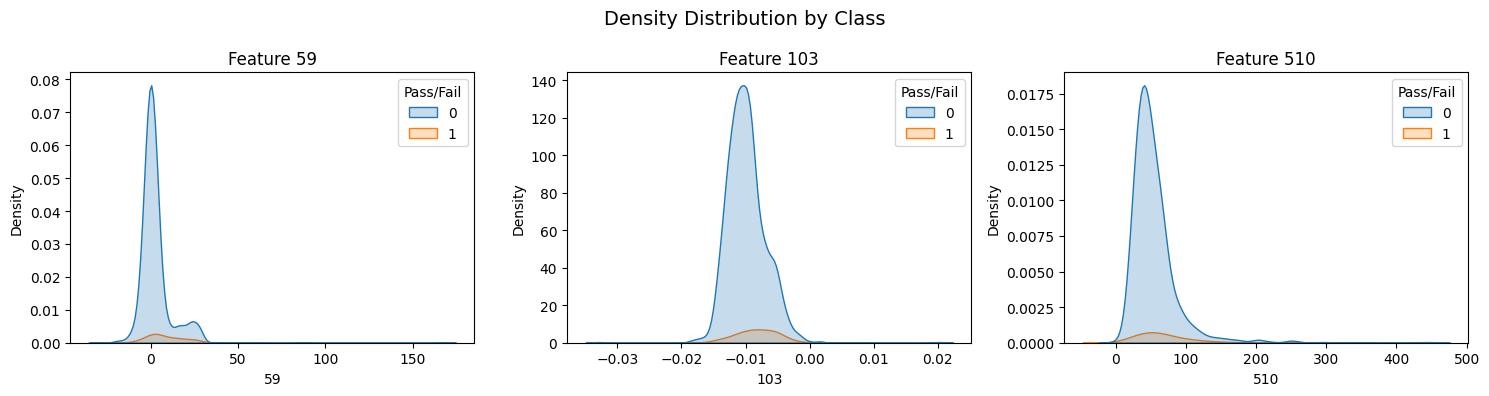

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

for i, col in enumerate(top3_features.index):
    sns.kdeplot(data=pd.concat([X[col], y], axis=1),
                x=col,
                hue=y.name,
                fill=True,
                ax=axes[i])
    
    axes[i].set_title(f"Feature {col}")
    
plt.suptitle("Density Distribution by Class", fontsize=14)
plt.tight_layout()
plt.show()

Gustoćne distribucije pokazuju značajno preklapanje između klasa, što potvrđuje kompleksnost problema i otežava separaciju u prostoru obeležja.

### Correlation Heatmap

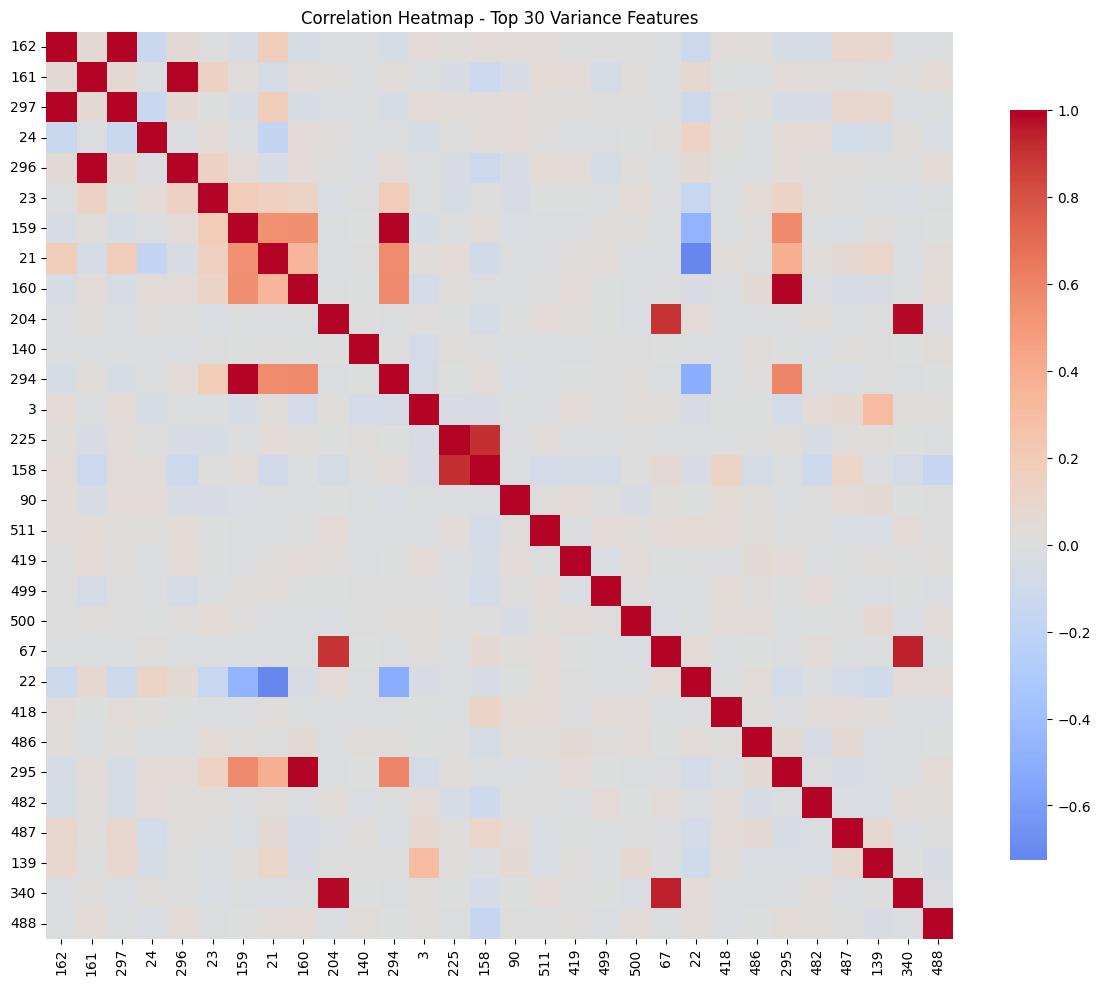

In [12]:
top_var = X.var().sort_values(ascending=False).head(30).index

corr_matrix = X[top_var].corr()

plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    square=True,
    cbar_kws={"shrink": .8}
)

plt.title("Correlation Heatmap - Top 30 Variance Features")
plt.tight_layout()
plt.show()

Korelaciona matrica pokazuje prisustvo blokova visoko korelisanih atributa, što ukazuje na redundantnost i opravdava primenu correlation filter metode radi smanjenja multikolinearnosti.

## Missing vrednosti

In [13]:
missing = X.isnull().sum()
missing_percent = (missing / len(X)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing,
    "Missing %": missing_percent
}).sort_values("Missing %", ascending=False)

print(missing_df.head(20))

     Missing Count  Missing %
157           1429  91.193363
292           1429  91.193363
293           1429  91.193363
158           1429  91.193363
492           1341  85.577537
358           1341  85.577537
220           1341  85.577537
85            1341  85.577537
517           1018  64.964901
518           1018  64.964901
383           1018  64.964901
111           1018  64.964901
109           1018  64.964901
246           1018  64.964901
382           1018  64.964901
384           1018  64.964901
245           1018  64.964901
110           1018  64.964901
244           1018  64.964901
516           1018  64.964901


# Baseline model pre FS

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced', max_iter=1000))
])

cv = StratifiedKFold(5, shuffle=True, random_state=42)

roc_baseline = cross_val_score(pipe_lr, X, y, cv=cv, scoring='roc_auc').mean()
ap_baseline = cross_val_score(pipe_lr, X, y, cv=cv, scoring='average_precision').mean()
bal_acc_baseline = cross_val_score(pipe_lr, X, y, cv=cv,scoring='balanced_accuracy').mean()


print("BASELINE REZULTATI")
print("ROC-AUC:", roc_baseline)
print("Average Precision:", ap_baseline)
print("Balanced accuracy", bal_acc_baseline )
print("Broj atributa:", X.shape[1])


BASELINE REZULTATI
ROC-AUC: 0.6586968824651745
Average Precision: 0.14884975891133795
Balanced accuracy 0.5461727100490016
Broj atributa: 590


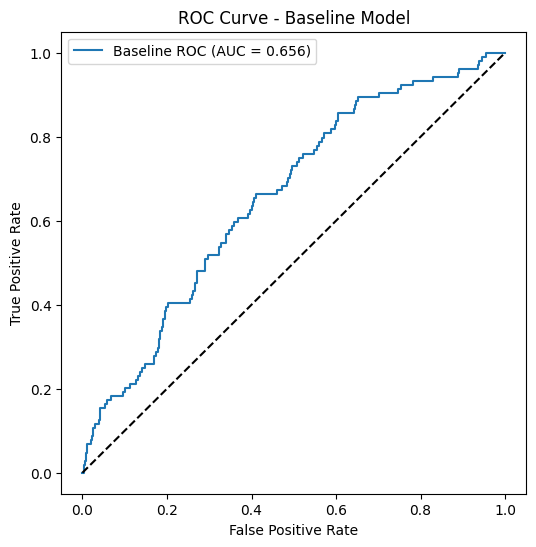

In [15]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = cross_val_predict(pipe_lr, X, y, cv=cv, method='predict_proba')[:,1]

fpr, tpr, _ = roc_curve(y, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'Baseline ROC (AUC = {roc_auc:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Baseline Model")
plt.legend()
plt.show()

### Analiza doprinosa atributa modelu

In [16]:
pipe_lr.fit(X, y)
coefs = pipe_lr.named_steps['model'].coef_[0]

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": coefs
}).sort_values("Coefficient", key=abs, ascending=False)

print(coef_df.head(20))

    Feature  Coefficient
56       56     2.841166
59       59     1.955770
425     425     1.643923
132     132    -1.639000
216     216     1.469405
388     388     1.350162
415     415    -1.343529
333     333     1.318784
365     365     1.316202
61       61     1.300815
25       25     1.233780
53       53    -1.162090
311     311    -1.154253
142     142    -1.143760
305     305    -1.137533
277     277     1.114123
471     471     1.110608
168     168     1.104187
239     239     1.084412
129     129     1.073459


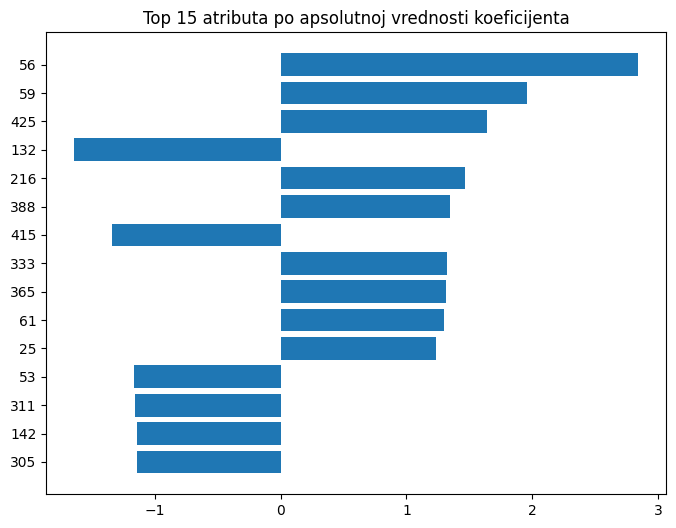

In [17]:
top_coef = coef_df.head(15)

plt.figure(figsize=(8,6))
plt.barh(top_coef["Feature"].astype(str), top_coef["Coefficient"])
plt.gca().invert_yaxis()
plt.title("Top 15 atributa po apsolutnoj vrednosti koeficijenta")
plt.show()

# FEATURE SELECTION

In [18]:
X_unsup = X.copy()
initial_features = X_unsup.shape[1]

print("Početni broj atributa:", initial_features)

Početni broj atributa: 590


## 1. FILTER METODE

## UNSUPERVISED FILTER METHODS

U ovoj fazi primenjene su filter metode koje ne koriste informacije o ciljnoj promenljivoj. Cilj je bio uklanjanje nerelevantnih i redundantnih atributa pre primene nadgledanih tehnika.

### DROP MISSING

In [19]:
thresholds = [30, 40, 50, 60]
results_missing = []

for t in thresholds:
    X_tmp = X.copy()
    missing_percent = X_tmp.isnull().mean()*100
    cols = missing_percent[missing_percent > t].index
    X_tmp = X_tmp.drop(columns=cols)

    roc = cross_val_score(pipe_lr, X_tmp, y, cv=cv, scoring='roc_auc').mean()
    results_missing.append((t, X_tmp.shape[1], roc))

pd.DataFrame(results_missing, columns=["Threshold", "Features", "ROC-AUC"])

,Threshold,Features,ROC-AUC
0,30,558,0.660052
1,40,558,0.660052
2,50,562,0.661492
3,60,566,0.661099


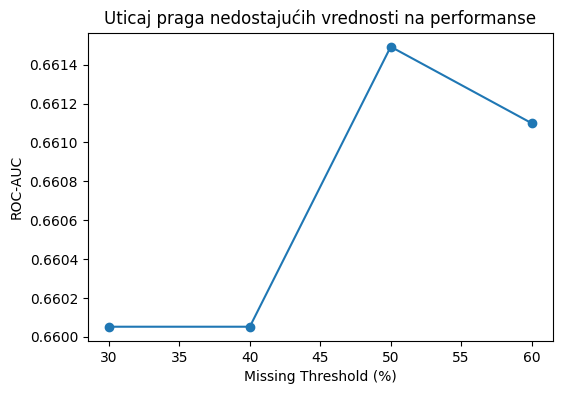

In [20]:
df_missing = pd.DataFrame(results_missing, columns=["Threshold", "Features", "ROC-AUC"])

plt.figure(figsize=(6,4))
plt.plot(df_missing["Threshold"], df_missing["ROC-AUC"], marker='o')
plt.xlabel("Missing Threshold (%)")
plt.ylabel("ROC-AUC")
plt.title("Uticaj praga nedostajućih vrednosti na performanse")
plt.show()

In [21]:
missing_percent = X_unsup.isnull().mean() * 100

threshold = 50
cols_missing = missing_percent[missing_percent > threshold].index

print("Broj atributa sa >50% missing:", len(cols_missing))

X_unsup = X_unsup.drop(columns=cols_missing)
X_unsup_after_missing = X_unsup.copy()

print("Dimenzije nakon Drop Missing:", X_unsup.shape)

Broj atributa sa >50% missing: 28
Dimenzije nakon Drop Missing: (1567, 562)


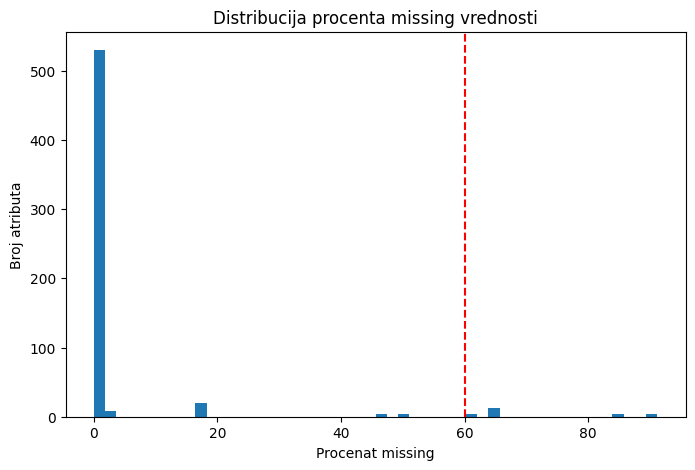

In [22]:
plt.figure(figsize=(8,5))
plt.hist(missing_percent, bins=50)
plt.axvline(60, color='red', linestyle='--')
plt.title("Distribucija procenta missing vrednosti")
plt.xlabel("Procenat missing")
plt.ylabel("Broj atributa")
plt.show()

In [23]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_unsup = pd.DataFrame(
    imputer.fit_transform(X_unsup),
    columns=X_unsup.columns
)

print("Preostali missing:", X_unsup.isnull().sum().sum())

Preostali missing: 0


Atributi sa više od 60% nedostajućih vrednosti uklonjeni su iz analize.
Rezultat:
- Uklonjeno: 24 atributa
- Preostalo: 566 atributa

Distribucija procenta missing vrednosti prikazana je na histogramu, gde se jasno uočava da mali broj atributa ima ekstremno visok procenat nedostajućih vrednosti.

### VARIANCE THRESHOLD

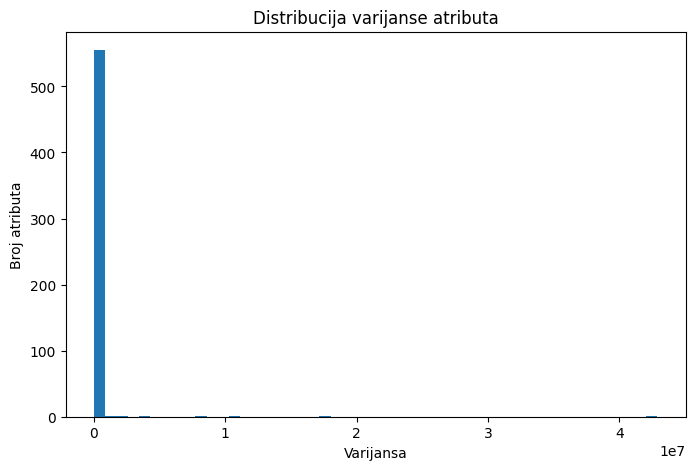

In [24]:
variances = X_unsup.var()

plt.figure(figsize=(8,5))
plt.hist(variances, bins=50)
plt.title("Distribucija varijanse atributa")
plt.xlabel("Varijansa")
plt.ylabel("Broj atributa")
plt.show()

In [25]:
from sklearn.feature_selection import VarianceThreshold

threshold = 0.01
selector_var = VarianceThreshold(threshold=threshold)
selector_var.fit(X_unsup)

selected_var = X_unsup.columns[selector_var.get_support()]
removed_var = X_unsup.columns[~selector_var.get_support()]

print("Broj uklonjenih atributa (low variance):", len(removed_var))

X_unsup = X_unsup[selected_var]
X_unsup_after_variance = X_unsup.copy()

print("Dimenzije nakon Variance Filter:", X_unsup.shape)

Broj uklonjenih atributa (low variance): 265
Dimenzije nakon Variance Filter: (1567, 297)


Atributi sa veoma niskom varijansom ne doprinose diskriminaciji klasa.
Primenjen je prag varijanse: 0.01.
Rezultat:
- Uklonjeno: 265 atributa
- Preostalo: 301 atribut

Histogram varijanse pokazuje da većina atributa ima vrlo malu disperziju.

### CORRELATION FILTER

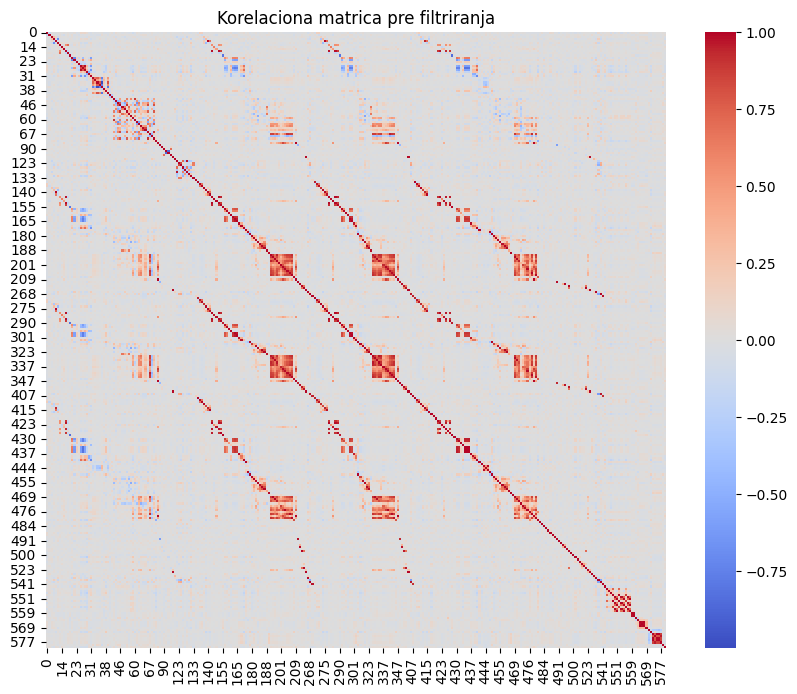

In [26]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(X_unsup.corr(), cmap='coolwarm', center=0)
plt.title("Korelaciona matrica pre filtriranja")
plt.show()

In [27]:
corr_matrix = X_unsup.corr().abs()

upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

to_drop_corr = [
    column for column in upper.columns
    if any(upper[column] > 0.9)
]

print("Broj uklonjenih atributa (high correlation):", len(to_drop_corr))

X_unsup = X_unsup.drop(columns=to_drop_corr)

print("Dimenzije nakon Correlation Filter:", X_unsup.shape)

Broj uklonjenih atributa (high correlation): 118
Dimenzije nakon Correlation Filter: (1567, 179)


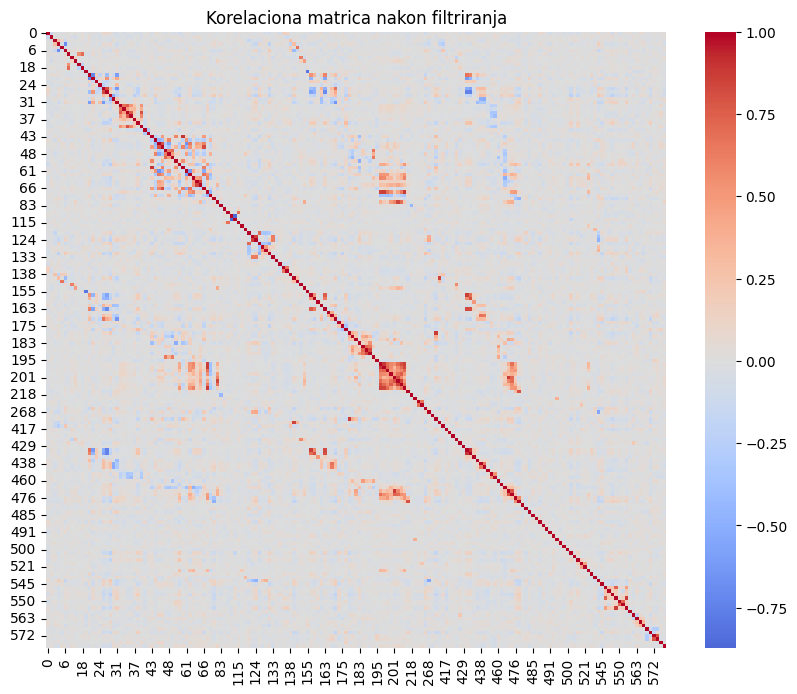

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(X_unsup.corr(), cmap='coolwarm', center=0)
plt.title("Korelaciona matrica nakon filtriranja")
plt.show()

Uklonjeni su atributi sa visokom međusobnom korelacijom (|r| > 0.9) kako bi se smanjila redundantnost i multikolinearnost.
Rezultat:

- Uklonjeno: 119 atributa
- Preostalo: 182 atributa

Korelaciona matrica nakon filtriranja pokazuje značajno smanjenu strukturu visoko korelisanih blokova.

In [29]:
print("Broj atributa:", X_unsup.shape[1])

roc_unsup = cross_val_score(
    pipe_lr,
    X_unsup,
    y,
    cv=cv,
    scoring='roc_auc'
).mean()

ap_unsup = cross_val_score(
    pipe_lr,
    X_unsup,
    y,
    cv=cv,
    scoring='average_precision'
).mean()

bal_acc_unsup = cross_val_score(
    pipe_lr,
    X_unsup,
    y,
    cv=cv,
    scoring='balanced_accuracy'
).mean()

print("UNSUPERVISED FILTER (Variance + Correlation)")
print("ROC-AUC:", roc_unsup)
print("Average Precision:", ap_unsup)
print("Balanced Accuracy:", bal_acc_unsup)
print("Broj atributa:", X_unsup.shape[1])

Broj atributa: 179
UNSUPERVISED FILTER (Variance + Correlation)
ROC-AUC: 0.6403226847801161
Average Precision: 0.12072508970486288
Balanced Accuracy: 0.5581995418205621
Broj atributa: 179


### LAPLACIAN SCORE

In [30]:
from sklearn.neighbors import kneighbors_graph
from scipy.sparse import csgraph

def laplacian_score(X_arr, n_neighbors=5):
    """
    Izračunava Laplacian Score za svaki atribut.
    Manji score = atribut bolje čuva lokalnu strukturu = važniji je.
    """
    n_samples, n_features = X_arr.shape
    
    # (KNN graf)
    W = kneighbors_graph(X_arr, n_neighbors=n_neighbors,
                         mode='connectivity', include_self=False)
    W = (W + W.T) / 2  # simetrizacija
    W = W.toarray()
    
    # laplacijan i stepen matrica
    D = np.diag(W.sum(axis=1))
    L = D - W
    
    scores = []
    for i in range(n_features):
        f = X_arr[:, i]
        f = f - (f @ D.sum(axis=1)) / D.sum()  # centriranje
        
        numerator   = f @ L @ f
        denominator = f @ D @ f
        
        score = numerator / denominator if denominator != 0 else np.inf
        scores.append(score)
    
    return np.array(scores)

# primena na X_unsup 
X_unsup_arr = X_unsup.values

ls_scores = laplacian_score(X_unsup_arr, n_neighbors=5)

# DataFrame sa rezultatima
ls_df = pd.DataFrame({
    'Feature'        : X_unsup.columns,
    'Laplacian Score': ls_scores
}).sort_values('Laplacian Score')  # manji = bolji

print("\nTop 20 atributa (najmanji Laplacian Score = najvažniji):")
print(ls_df.head(20).to_string(index=False))


Top 20 atributa (najmanji Laplacian Score = najvažniji):
Feature  Laplacian Score
    162         0.011274
    161         0.033338
     24         0.054032
    430         0.060217
    431         0.081866
     25         0.086971
     31         0.126654
     21         0.139399
    159         0.144997
    163         0.146318
     23         0.167554
     26         0.179492
     22         0.193482
    160         0.244765
    432         0.413451
    169         0.492157
    433         0.513143
      3         0.631817
     29         0.668530
    225         0.671538


Laplacian Score je unsupervised metoda koja rangira atribute prema tome koliko dobro čuvaju lokalnu geometrijsku strukturu podataka, atributi sa manjim skorom važniji su jer bolje reflektuju susedske odnose između uzoraka u prostoru obeležja.

Atribut 162 ima najmanji Laplacian Score (0.011), što ga čini najinformativnijim prema ovom kriterijumu, praćen atributima 161 i 24. Primećuje se da su visoko rangirani atributi uglavnom iz opsega indeksa 20-30 i 159-163, što sugeriše da ove grupe senzorskih signala nose konzistentnu lokalnu strukturu u podacima.

Važno je napomenuti da Laplacian Score ne uzima u obzir ciljnu promenljivu, pa visoko rangiran atribut ne mora biti i diskriminativan, zbog toga se ova metoda koristi kao dopuna supervised filter metodama.

     k   ROC-AUC        AP  Balanced Acc
0   20  0.478928  0.104048      0.480269
1   50  0.619837  0.140095      0.609018
2  100  0.676952  0.173330      0.650094
3  150  0.669056  0.139192      0.578924


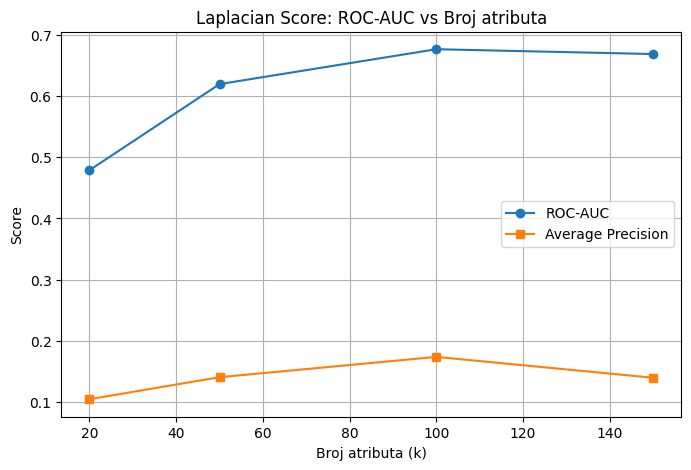

In [31]:
k_values = [20, 50, 100, 150]
results_ls = []

for k in k_values:
    # Biramo k atributa sa najmanjim LS
    selected_ls = ls_df.head(k)['Feature'].tolist()
    X_k = X_unsup[selected_ls]
    
    pipe_eval = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(class_weight='balanced', 
                                     max_iter=1000))
    ])
    
    roc = cross_val_score(pipe_eval, X_k, y, cv=cv, 
                          scoring='roc_auc').mean()
    ap  = cross_val_score(pipe_eval, X_k, y, cv=cv, 
                          scoring='average_precision').mean()
    
    bal = cross_val_score(pipe_eval,X_k,y,
        cv=cv,
        scoring='balanced_accuracy').mean()

    
    results_ls.append((k, roc, ap, bal))

results_ls = pd.DataFrame(results_ls,
                            columns=["k", "ROC-AUC", "AP", "Balanced Acc"])
print(results_ls)


plt.figure(figsize=(8,5))
plt.plot(results_ls["k"], results_ls["ROC-AUC"], marker='o', label="ROC-AUC")
plt.plot(results_ls["k"], results_ls["AP"], marker='s', label="Average Precision")
plt.xlabel("Broj atributa (k)")
plt.ylabel("Score")
plt.title("Laplacian Score: ROC-AUC vs Broj atributa")
plt.legend()
plt.grid(True)
plt.show()

Ovaj obrazac potvrđuje ključno ograničenje unsupervised metoda: atributi koji čuvaju lokalnu geometrijsku strukturu podataka ne moraju biti diskriminativni prema ciljnoj promenljivoj. Stoga je potrebno više atributa da bi se postigla zadovoljavajuća klasifikaciona performansa.

Poređenja radi, Target Correlation sa k=20 dostiže ROC-AUC=0.741, dok Laplacian Score sa istim k postiže svega 0.477, što jasno ilustruje prednost supervised pristupa kada je dostupna ciljna promenljiva.

Optimalni izbor za Laplacian Score je k=100 (ROC-AUC=0.661).

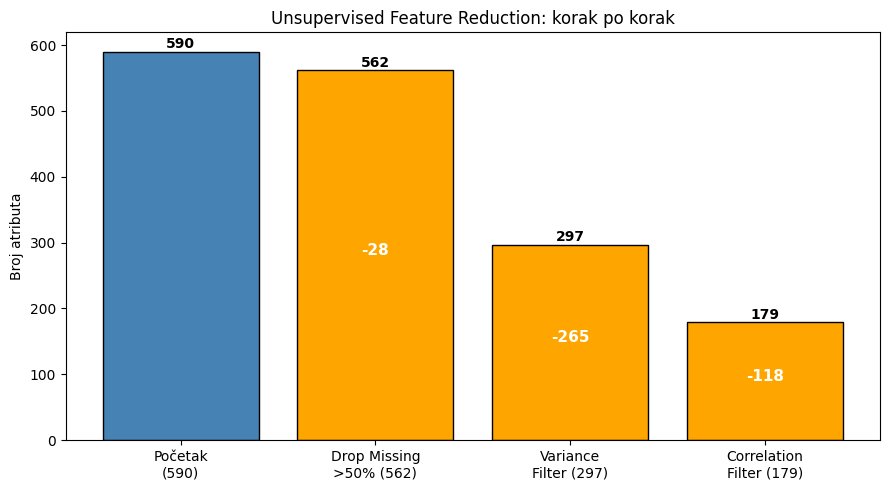

In [32]:
n_start    = X.shape[1]                          # 590, originalni dataset
n_missing  = X_unsup_after_missing.shape[1]      # nakon drop missing  
n_variance = X_unsup_after_variance.shape[1]     # nakon variance filter
n_corr     = X_unsup.shape[1]                    # finalno stanje

features = [n_start, n_missing, n_variance, n_corr]
removed  = [0,
            n_start   - n_missing,
            n_missing - n_variance,
            n_variance - n_corr]

stages = [
    f'Početak\n({n_start})',
    f'Drop Missing\n>50% ({n_missing})',
    f'Variance\nFilter ({n_variance})',
    f'Correlation\nFilter ({n_corr})'
]

fig, ax1 = plt.subplots(figsize=(9, 5))
bars = ax1.bar(stages, features, color=['steelblue','orange','orange','orange'], edgecolor='black')
ax1.set_ylabel("Broj atributa")
ax1.set_title("Unsupervised Feature Reduction: korak po korak")

for bar, feat, rem in zip(bars, features, removed):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{feat}', ha='center', fontweight='bold')
    if rem > 0:
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2,
                 f'-{rem}', ha='center', color='white', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## SUPERVISED FILTER METHODS

In [33]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_folds = RepeatedStratifiedKFold(
    n_splits=5,
    n_repeats=3,
    random_state=42
)
k_values = [20, 50, 100, 150]

### TARGET CORRELATION (Pearson)

In [34]:
# Custom Pearson selector unutar pipeline-a
from sklearn.base import BaseEstimator, TransformerMixin
class PearsonSelector(BaseEstimator, TransformerMixin):
    def __init__(self, k=20):
        self.k = k

    def fit(self, X, y):
        corrs = np.abs(np.corrcoef(X, y, rowvar=False)[-1, :-1])
        self.indices_ = np.argsort(corrs)[-self.k:]
        return self

    def transform(self, X):
        return X[:, self.indices_]


results_corr = []

for k in k_values:
    
    pipe_corr = Pipeline([
        ('imputer',  SimpleImputer(strategy='median')),
        ('variance', VarianceThreshold(threshold=0.01)),
        ('pearson',  PearsonSelector(k=k)),
        ('scaler',   StandardScaler()),
        ('model',    LogisticRegression(class_weight='balanced',
                                        max_iter=1000))
    ])
    
    roc = cross_val_score(pipe_corr, X, y,
                          cv=cv_folds,
                          scoring='roc_auc').mean()
    
    ap  = cross_val_score(pipe_corr, X, y,
                          cv=cv_folds,
                          scoring='average_precision').mean()
    bal = cross_val_score(pipe_corr,X,y,
    cv=cv_folds,
    scoring='balanced_accuracy').mean()

    
    results_corr.append((k, roc, ap, bal))

results_corr = pd.DataFrame(results_corr,
                            columns=["k", "ROC-AUC", "AP", "Balanced Acc"])

print("TARGET CORRELATION:")
print(results_corr)


TARGET CORRELATION:
     k   ROC-AUC        AP  Balanced Acc
0   20  0.704944  0.158469      0.661034
1   50  0.693437  0.156558      0.656171
2  100  0.691230  0.169630      0.640743
3  150  0.666702  0.155776      0.621019


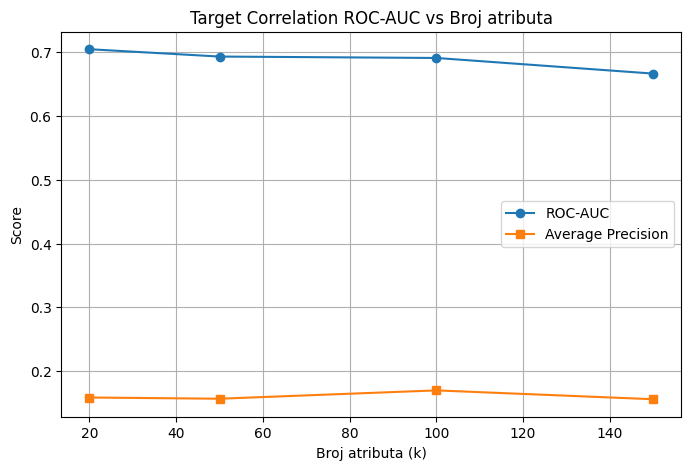

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(results_corr["k"], results_corr["ROC-AUC"], marker='o', label="ROC-AUC")
plt.plot(results_corr["k"], results_corr["AP"], marker='s', label="Average Precision")

plt.xlabel("Broj atributa (k)")
plt.ylabel("Score")
plt.title("Target Correlation ROC-AUC vs Broj atributa")
plt.legend()
plt.grid(True)
plt.show()

Rezultati pokazuju da selekcija 20 atributa sa najvišom apsolutnom 
korelacijom sa ciljnom promenljivom daje najbolji ROC-AUC (0.741), 
dok povećanje broja atributa (k=50, 100, 150) postepeno smanjuje 
performanse. Ovo ukazuje da dodavanje manje korelisanih atributa 
unosi šum i smanjuje sposobnost modela da razlikuje klase.
Average Precision ostaje relativno stabilna (~0.20-0.23) kroz sve 
vrednosti k, što sugeriše da Top-20 atributa nose najveći deo 
diskriminativne informacije. Optimalni izbor je k=20.

### ANOVA F-test

In [36]:
from sklearn.feature_selection import SelectKBest, f_classif
results_anova = []

for k in k_values:
    
    pipe_anova = Pipeline([
        ('imputer',  SimpleImputer(strategy='median')),
        ('variance', VarianceThreshold(threshold=0.01)),
        ('anova',    SelectKBest(score_func=f_classif, k=k)),
        ('scaler',   StandardScaler()),
        ('model',    LogisticRegression(class_weight='balanced',
                                        max_iter=1000))
    ])
    
    roc = cross_val_score(pipe_anova, X, y,
                          cv=cv_folds,
                          scoring='roc_auc').mean()
    
    ap  = cross_val_score(pipe_anova, X, y,
                          cv=cv_folds,
                          scoring='average_precision').mean()
    
    bal = cross_val_score(pipe_anova,X,y,
    cv=cv_folds,
    scoring='balanced_accuracy').mean()

    
    results_anova.append((k, roc, ap, bal))

results_anova = pd.DataFrame(results_anova,
                            columns=["k", "ROC-AUC", "AP", "Balanced Acc"])

print("\nANOVA F-TEST:")
print(results_anova)



ANOVA F-TEST:
     k   ROC-AUC        AP  Balanced Acc
0   20  0.704944  0.158469      0.661034
1   50  0.693426  0.156566      0.656171
2  100  0.691263  0.169642      0.640743
3  150  0.666691  0.155767      0.621019


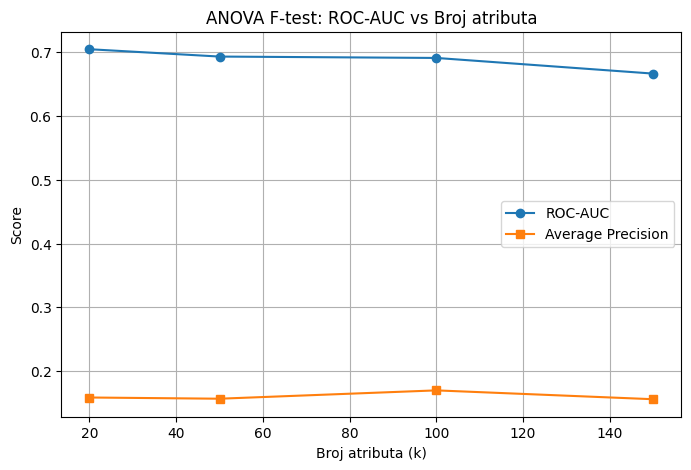

In [37]:
plt.figure(figsize=(8,5))
plt.plot(results_anova["k"], results_anova["ROC-AUC"], marker='o', label="ROC-AUC")
plt.plot(results_anova["k"], results_anova["AP"], marker='s', label="Average Precision")
plt.xlabel("Broj atributa (k)")
plt.ylabel("Score")
plt.title("ANOVA F-test: ROC-AUC vs Broj atributa")
plt.legend()
plt.grid(True)
plt.show()

ANOVA F-test pokazuje sličan trend, ROC-AUC je najviši za k=20 
(0.713) i opada sa povećanjem broja atributa, dostižući minimum 
kod k=100 (0.659). Average Precision takođe blago opada sa k, 
što potvrđuje da statistički najznačajniji atributi (prema 
F-statistici) nose najveću diskriminativnu moć.
U poređenju sa Target Correlation metodom, ANOVA daje nešto niže 
ROC-AUC vrednosti (0.713 vs 0.741 za k=20), što sugerišeda 
Pearsonova korelacija sa ciljnom promenljivom u ovom slučaju 
bolje rangira atribute od ANOVA F-testa.
Optimalni izbor je k=20.

### Presek Target Correlation i ANOVA

In [38]:
# k=20 
pipe_corr.fit(X, y)
pipe_anova.fit(X, y)

corr_idx  = pipe_corr.named_steps['pearson'].indices_
anova_idx = pipe_anova.named_steps['anova'].get_support(indices=True)

print("Presek:", len(set(corr_idx).intersection(set(anova_idx))))

Presek: 150


Slični (u ovom slučaju praktično identični) rezultati između Target Correlation i ANOVA metode ukazuju na to da obe metode rangiraju skoro iste atribute kao najvažnije. To je očekivano jer su obe metode zasnovane na linearnom odnosu između obeležja i ciljne promenljive, pa u slučaju dominantno linearnih zavisnosti dolazi do izbora gotovo istog skupa atributa i samim tim istih performansi modela.

## Mutual Information

In [39]:
from sklearn.feature_selection import mutual_info_classif
results_mi = []

for k in k_values:
    
    pipe_mi = Pipeline([
        ('imputer',  SimpleImputer(strategy='median')),
        ('variance', VarianceThreshold(threshold=0.01)),
        ('mi',       SelectKBest(
                        score_func=lambda X, y:
                        mutual_info_classif(X, y, random_state=42),
                        k=k)),
        ('scaler',   StandardScaler()),
        ('model',    LogisticRegression(class_weight='balanced',
                                        max_iter=1000))
    ])
    
    roc = cross_val_score(pipe_mi, X, y,
                          cv=cv_folds,
                          scoring='roc_auc').mean()
    
    ap  = cross_val_score(pipe_mi, X, y,
                          cv=cv_folds,
                          scoring='average_precision').mean()
    
    bal = cross_val_score(pipe_mi,X,y,
        cv=cv_folds,
        scoring='balanced_accuracy').mean()

    
    results_mi.append((k, roc, ap, bal))

results_mi = pd.DataFrame(results_mi,
                            columns=["k", "ROC-AUC", "AP", "Balanced Acc"])

print("\nMUTUAL INFORMATION:")
print(results_mi)



MUTUAL INFORMATION:
     k   ROC-AUC        AP  Balanced Acc
0   20  0.607855  0.114951      0.580739
1   50  0.655483  0.151204      0.604938
2  100  0.668286  0.142171      0.635373
3  150  0.651723  0.140615      0.598404


Mutual Information pokazuje rastući trend ROC-AUC sa povećanjem broja atributa, od 0.605 (k=20) do maksimuma 0.639 (k=100), nakon čega stagnira (k=150:0.636). Average Precision takođe raste od 0.104 do 0.134.

Za razliku od Target Correlation (ROC-AUC=0.741 za k=20), Mutual Information postiže slabije rezultate sa malim brojem atributa. Ovo sugerišeda u ovom datasetu linearne zavisnosti (koje hvata Pearsonova korelacija) dominiraju nad nelinearnim odnosima koje detektuje MI.

Optimalni izbor je k=100 (ROC-AUC=0.639).

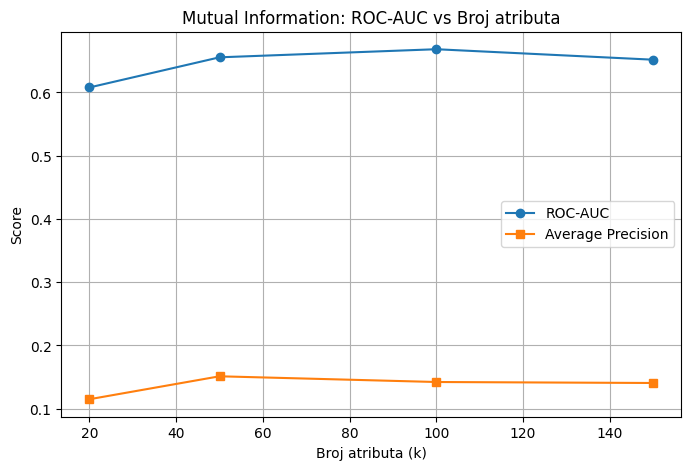

In [40]:
plt.figure(figsize=(8,5))
plt.plot(results_mi["k"], results_mi["ROC-AUC"], marker='o', label="ROC-AUC")
plt.plot(results_mi["k"], results_mi["AP"], marker='s', label="Average Precision")
plt.xlabel("Broj atributa (k)")
plt.ylabel("Score")
plt.title("Mutual Information: ROC-AUC vs Broj atributa")
plt.legend()
plt.grid(True)
plt.show()

## Chi-square

In [41]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

results_chi2 = []

for k in k_values:
    
    pipe_chi2 = Pipeline([
        ('imputer',  SimpleImputer(strategy='median')),
        ('variance', VarianceThreshold(threshold=0.01)),
        ('scaler',   MinMaxScaler()),   # chi2 zahteva X >= 0
        ('chi2',     SelectKBest(score_func=chi2, k=k)),
        ('model',    LogisticRegression(class_weight='balanced',
                                        max_iter=1000))
    ])
    
    roc = cross_val_score(pipe_chi2, X, y,
                          cv=cv_folds,
                          scoring='roc_auc').mean()
    
    ap  = cross_val_score(pipe_chi2, X, y,
                          cv=cv_folds,
                          scoring='average_precision').mean()
    
    bal = cross_val_score(pipe_chi2,X,y,
    cv=cv_folds,
    scoring='balanced_accuracy').mean()

    
    results_chi2.append((k, roc, ap, bal))

results_chi2 = pd.DataFrame(results_chi2,
                            columns=["k", "ROC-AUC", "AP", "Balanced Acc"])

print("\nCHI-SQUARE:")
print(results_chi2)



CHI-SQUARE:
     k   ROC-AUC        AP  Balanced Acc
0   20  0.577281  0.106224      0.540644
1   50  0.662071  0.141281      0.599232
2  100  0.676448  0.149808      0.608974
3  150  0.677411  0.157389      0.605019


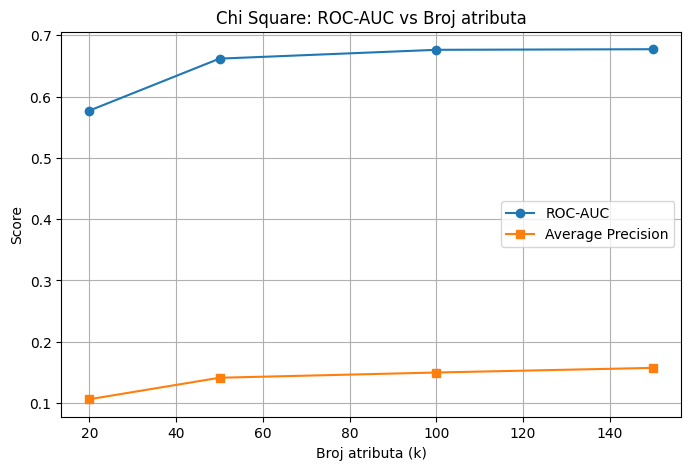

In [42]:
plt.figure(figsize=(8,5))
plt.plot(results_chi2["k"], results_chi2["ROC-AUC"], marker='o', label="ROC-AUC")
plt.plot(results_chi2["k"], results_chi2["AP"], marker='s', label="Average Precision")
plt.xlabel("Broj atributa (k)")
plt.ylabel("Score")
plt.title("Chi Square: ROC-AUC vs Broj atributa")
plt.legend()
plt.grid(True)
plt.show()

In [43]:
def get_best_result(df, method_name):
    best_row = df.loc[df["ROC-AUC"].idxmax()]
    return {
        "Method": method_name,
        "k": int(best_row["k"]),
        "ROC-AUC": best_row["ROC-AUC"],
        "AP": best_row["AP"],
        "Balanced Acc": best_row["Balanced Acc"]
    }

final_results = pd.DataFrame([
    get_best_result(results_corr,  "Target Correlation"),
    get_best_result(results_anova, "ANOVA"),
    get_best_result(results_mi,    "Mutual Information"),
    get_best_result(results_chi2,  "Chi-square"),
])

# Dodaj baseline
baseline_row = {
    "Method": "Baseline",
    "k": X.shape[1],
    "ROC-AUC": roc_baseline,
    "AP": ap_baseline,
    "Balanced Acc": bal_acc_baseline
}

final_results = pd.concat(
    [pd.DataFrame([baseline_row]), final_results],
    ignore_index=True
)

print("\nFINALNO POREĐENJE FILTER METODA:")
print(final_results)



FINALNO POREĐENJE FILTER METODA:
               Method    k   ROC-AUC        AP  Balanced Acc
0            Baseline  590  0.658697  0.148850      0.546173
1  Target Correlation   20  0.704944  0.158469      0.661034
2               ANOVA   20  0.704944  0.158469      0.661034
3  Mutual Information  100  0.668286  0.142171      0.635373
4          Chi-square  150  0.677411  0.157389      0.605019


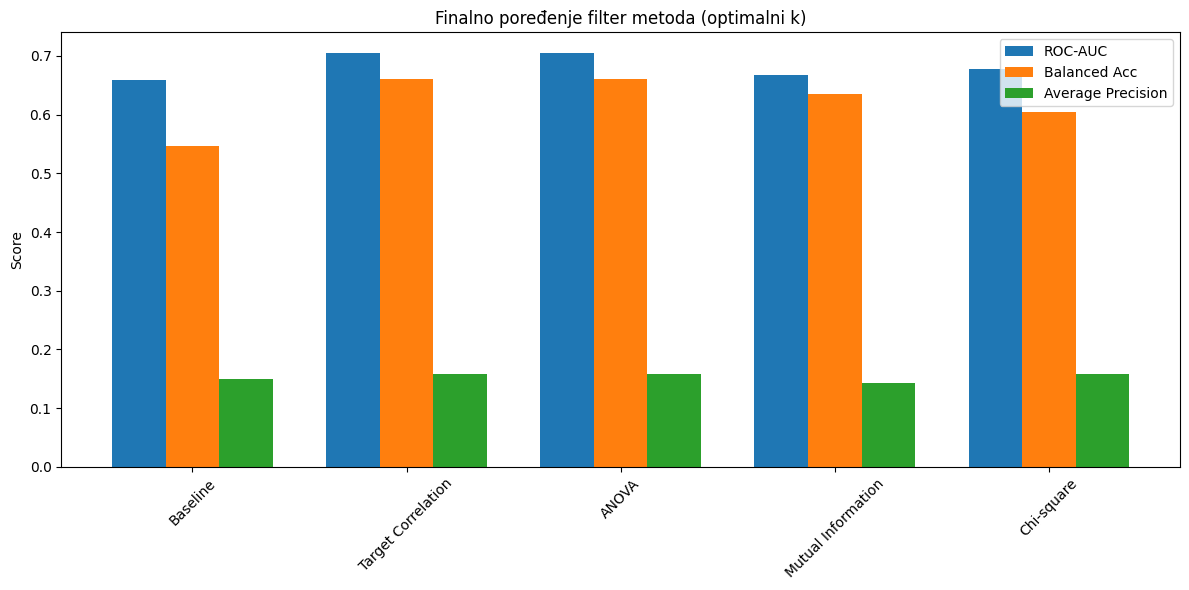

In [44]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(final_results))
width = 0.25

plt.figure(figsize=(12,6))

plt.bar(x - width, final_results["ROC-AUC"], width, label="ROC-AUC")
plt.bar(x,         final_results["Balanced Acc"], width, label="Balanced Acc")
plt.bar(x + width, final_results["AP"], width, label="Average Precision")

plt.xticks(x, final_results["Method"], rotation=45)
plt.ylabel("Score")
plt.title("Finalno poređenje filter metoda (optimalni k)")
plt.legend()
plt.tight_layout()
plt.show()

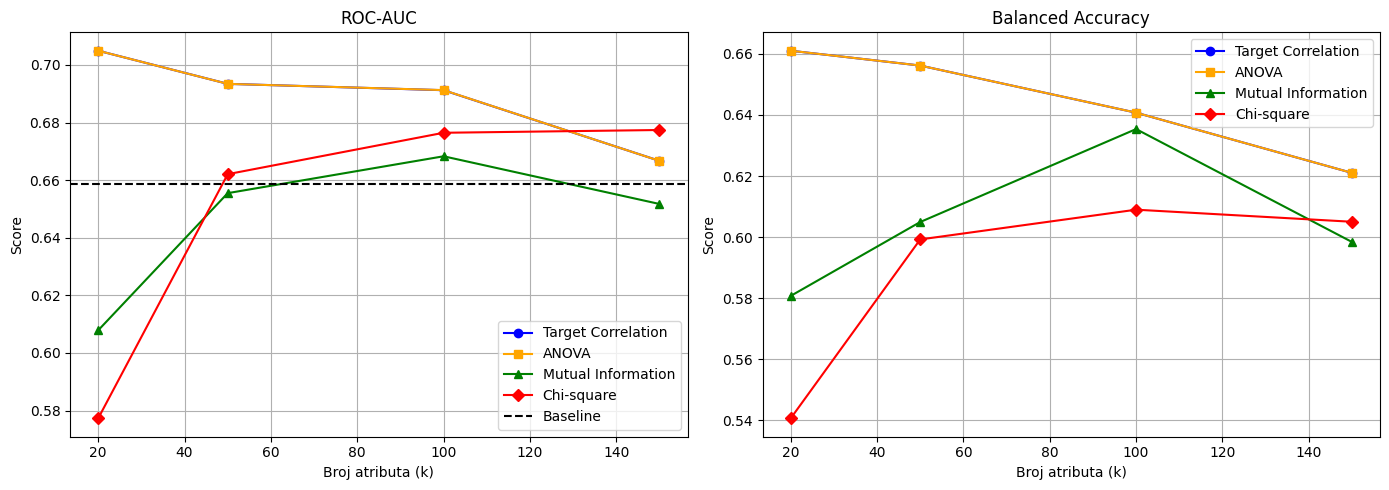

In [45]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

ax[0].plot(results_corr["k"],  results_corr["ROC-AUC"], 
           marker='o', color='blue', label='Target Correlation')

ax[0].plot(results_anova["k"], results_anova["ROC-AUC"], 
           marker='s', color='orange', label='ANOVA')

ax[0].plot(results_mi["k"],    results_mi["ROC-AUC"], 
           marker='^', color='green', label='Mutual Information')

ax[0].plot(results_chi2["k"],  results_chi2["ROC-AUC"], 
           marker='D', color='red', label='Chi-square')

ax[0].axhline(y=roc_baseline, linestyle='--', color='black', 
              label='Baseline')

ax[0].set_title("ROC-AUC")
ax[0].set_xlabel("Broj atributa (k)")
ax[0].set_ylabel("Score")
ax[0].legend()
ax[0].grid(True)


ax[1].plot(results_corr["k"],  results_corr["Balanced Acc"], 
           marker='o', color='blue', label='Target Correlation')

ax[1].plot(results_anova["k"], results_anova["Balanced Acc"], 
           marker='s', color='orange', label='ANOVA')

ax[1].plot(results_mi["k"],    results_mi["Balanced Acc"], 
           marker='^', color='green', label='Mutual Information')

ax[1].plot(results_chi2["k"],  results_chi2["Balanced Acc"], 
           marker='D', color='red', label='Chi-square')

ax[1].set_title("Balanced Accuracy")
ax[1].set_xlabel("Broj atributa (k)")
ax[1].set_ylabel("Score")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


Grafik pokazuje da sve nadgledane filter metode postižu najbolje performanse za manji broj atributa (k=20–50), nakon čega dolazi do blagog opadanja ROC-AUC i Balanced Accuracy, što ukazuje da dodavanje većeg broja obeležja ne doprinosi dodatnom poboljšanju modela. Target Correlation i ANOVA daju gotovo identične rezultate, dok Mutual Information i Chi-square pokazuju nešto slabije i nestabilnije performanse u poređenju sa njima.

Broj konstantnih atributa: 116


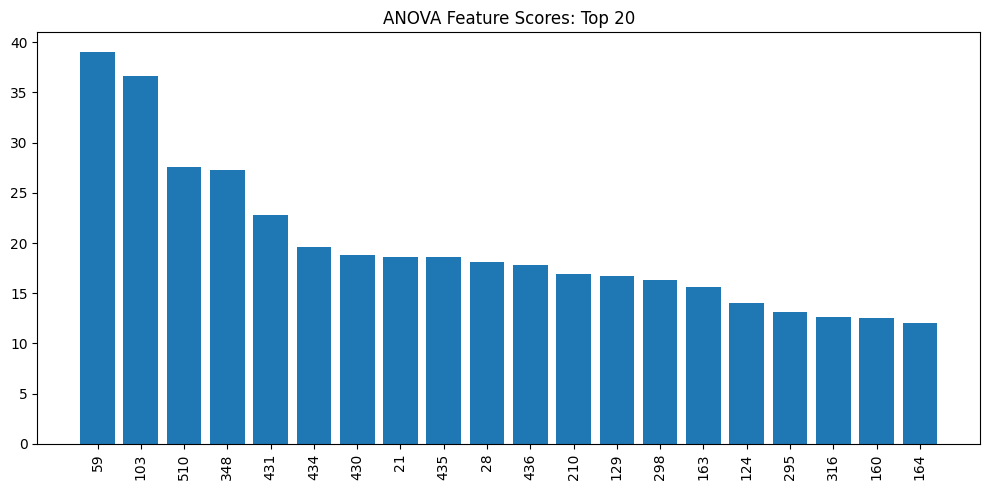

In [46]:
# imputacija
X_imp = SimpleImputer(strategy='median').fit_transform(X)

# uklanjanje konstanti
var_filter = VarianceThreshold(threshold=0.0)
X_clean = var_filter.fit_transform(X_imp)

# novi nazivi feature-a
feature_names_clean = X.columns[var_filter.get_support()]


selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_clean, y)

scores = pd.DataFrame({
    "Feature": feature_names_clean,
    "Score": selector.scores_
}).sort_values("Score", ascending=False)

print("Broj konstantnih atributa:",
      X.shape[1] - X_clean.shape[1])

top_n = 20
plt.figure(figsize=(10,5))
plt.bar(scores["Feature"][:top_n], scores["Score"][:top_n])
plt.xticks(rotation=90)
plt.title("ANOVA Feature Scores: Top 20")
plt.tight_layout()
plt.show()

U datasetu je identifikovan veliki broj konstantnih atributa, koji su uklonjeni primenom VarianceThreshold metode pre statističke evaluacije značajnosti atributa.

Broj konstantnih atributa: 116


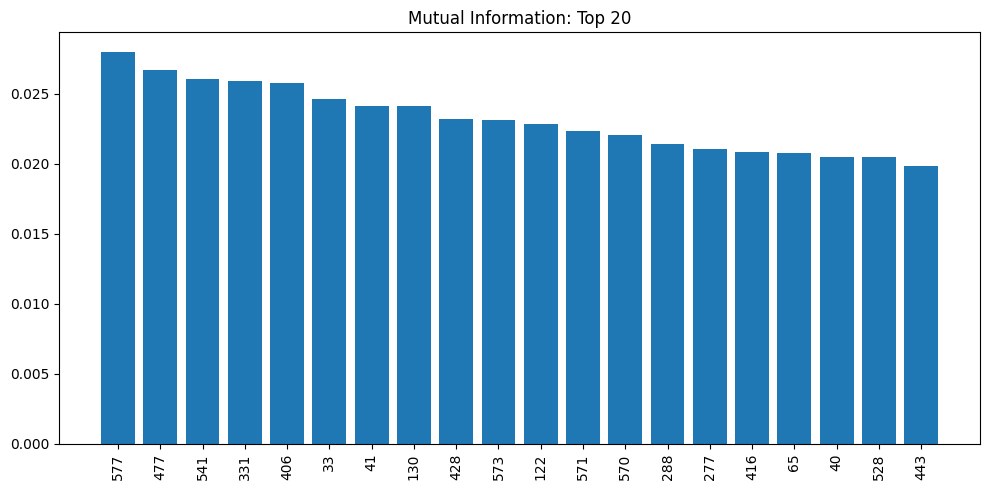

In [47]:
selector = SelectKBest(
    score_func=lambda X,y: mutual_info_classif(X,y,random_state=42),
    k='all'
)

selector.fit(X_imp, y)

scores_mi = pd.DataFrame({
    "Feature": X.columns,
    "Score": selector.scores_
}).sort_values("Score", ascending=False)

print("Broj konstantnih atributa:",
      X.shape[1] - X_clean.shape[1])

plt.figure(figsize=(10,5))
plt.bar(scores_mi["Feature"][:20], scores_mi["Score"][:20])
plt.xticks(rotation=90)
plt.title("Mutual Information: Top 20")
plt.tight_layout()
plt.show()

Broj konstantnih atributa: 116


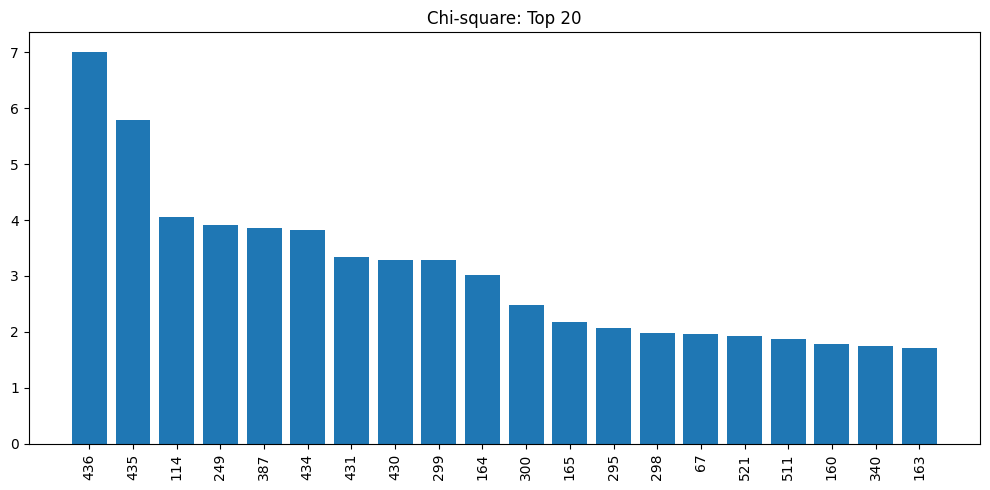

In [48]:
X_scaled = MinMaxScaler().fit_transform(X_imp)

selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_scaled, y)

scores_chi2 = pd.DataFrame({
    "Feature": X.columns,
    "Score": selector.scores_
}).sort_values("Score", ascending=False)

print("Broj konstantnih atributa:",
      X.shape[1] - X_clean.shape[1])

plt.figure(figsize=(10,5))
plt.bar(scores_chi2["Feature"][:20], scores_chi2["Score"][:20])
plt.xticks(rotation=90)
plt.title("Chi-square: Top 20")
plt.tight_layout()
plt.show()

ANOVA metoda pokazuje izraženu razliku između najvažnijih i manje važnih atributa, sa nekoliko obeležja koja imaju znatno veće F-score vrednosti, što ukazuje na snažnu linearnu diskriminativnu moć u odnosu na ciljnu promenljivu. Mutual Information daje ujednačeniju raspodelu skorova, bez naglog pada, što sugeriše da više atributa ima umeren doprinos modelu kroz potencijalno nelinearne zavisnosti. Chi-square metoda identifikuje nekoliko dominantnih atributa sa jasno izdvojenim skorovima, ali generalno pokazuje manju separaciju u odnosu na ANOVA, što može objasniti nešto slabije performanse u ROC-AUC analizi.

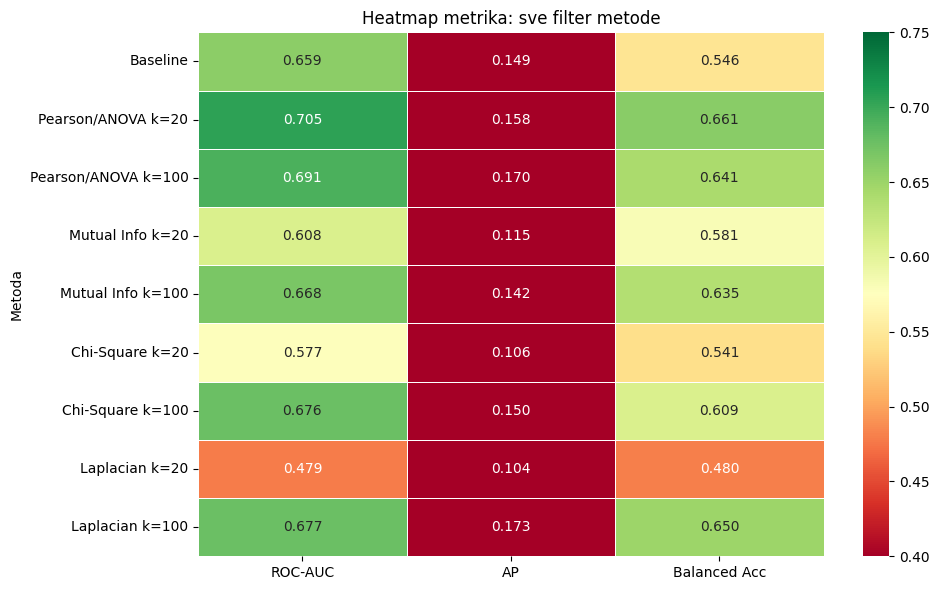

In [49]:
summary_data = {
    'Metoda': ['Baseline', 'Pearson/ANOVA k=20', 'Pearson/ANOVA k=100',
               'Mutual Info k=20', 'Mutual Info k=100',
               'Chi-Square k=20', 'Chi-Square k=100',
               'Laplacian k=20', 'Laplacian k=100'],
    'ROC-AUC': [roc_baseline,
                results_corr.loc[0,'ROC-AUC'], results_corr.loc[2,'ROC-AUC'],
                results_mi.loc[0,'ROC-AUC'],   results_mi.loc[2,'ROC-AUC'],
                results_chi2.loc[0,'ROC-AUC'], results_chi2.loc[2,'ROC-AUC'],
                results_ls.loc[0,'ROC-AUC'],   results_ls.loc[2,'ROC-AUC']],
    'AP': [ap_baseline,
           results_corr.loc[0,'AP'], results_corr.loc[2,'AP'],
           results_mi.loc[0,'AP'],   results_mi.loc[2,'AP'],
           results_chi2.loc[0,'AP'], results_chi2.loc[2,'AP'],
           results_ls.loc[0,'AP'],   results_ls.loc[2,'AP']],
    'Balanced Acc': [bal_acc_baseline,
                     results_corr.loc[0,'Balanced Acc'], results_corr.loc[2,'Balanced Acc'],
                     results_mi.loc[0,'Balanced Acc'],   results_mi.loc[2,'Balanced Acc'],
                     results_chi2.loc[0,'Balanced Acc'], results_chi2.loc[2,'Balanced Acc'],
                     results_ls.loc[0,'Balanced Acc'],   results_ls.loc[2,'Balanced Acc']],  
}

df_summary = pd.DataFrame(summary_data).set_index('Metoda')

plt.figure(figsize=(10, 6))
sns.heatmap(df_summary, annot=True, fmt='.3f', cmap='RdYlGn',
            vmin=0.4, vmax=0.75, linewidths=0.5)
plt.title("Heatmap metrika: sve filter metode")
plt.tight_layout()
plt.show()

# 2. Wrapper metode

## Forward Selection

In [50]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_validate 

imputer = SimpleImputer(strategy='median')
X_imp = imputer.fit_transform(X)
var_filter = VarianceThreshold(threshold=0.0)
X_var = var_filter.fit_transform(X_imp)
selector = SelectKBest(score_func=f_classif, k=50)
X_reduced = selector.fit_transform(X_var, y)

print("Nova dimenzija:", X_reduced.shape)

results_forward = []
k_values = [10, 20, 30] 

for k in k_values:
    
    pipe_forward = Pipeline([
        ('scaler', StandardScaler()),
        ('sfs', SequentialFeatureSelector(
                    LogisticRegression(class_weight='balanced', max_iter=200),
                    n_features_to_select=k,
                    direction='forward',
                    scoring='roc_auc',
                    cv=3,
                    n_jobs=-1
               )),
        ('model', LogisticRegression(class_weight='balanced', max_iter=200))
    ])
    scores = cross_validate(pipe_forward, X_reduced, y, 
                            cv=3, 
                            scoring=['roc_auc', 'balanced_accuracy'],
                            n_jobs=-1) 

    roc = scores['test_roc_auc'].mean()
    bal = scores['test_balanced_accuracy'].mean()

    results_forward.append((k, roc, bal))

results_forward = pd.DataFrame(results_forward,
                               columns=["k", "ROC-AUC", "Balanced Acc"])

print("\nKonačni rezultati:")
print(results_forward)



Nova dimenzija: (1567, 50)

Konačni rezultati:
    k   ROC-AUC  Balanced Acc
0  10  0.683587      0.588371
1  20  0.655700      0.585787
2  30  0.680870      0.582169


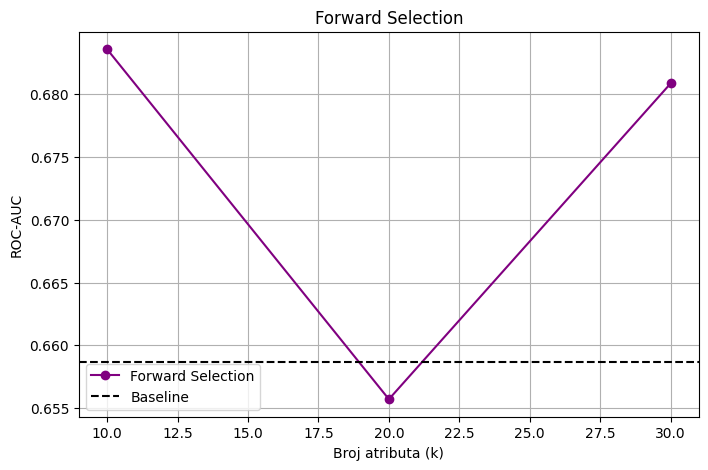

In [51]:
plt.figure(figsize=(8,5))
plt.plot(results_forward["k"],
         results_forward["ROC-AUC"],
         marker='o',
         color='purple',
         label='Forward Selection')

plt.axhline(y=roc_baseline,
            linestyle='--',
            color='black',
            label='Baseline')

plt.xlabel("Broj atributa (k)")
plt.ylabel("ROC-AUC")
plt.title("Forward Selection")
plt.legend()
plt.grid(True)
plt.show()

Zbog visoke dimenzionalnosti SECOM skupa podataka (590 atributa) i velike računske složenosti wrapper metoda, kompletna primena Forward Selection nad svim atributima zahtevala bi izuzetno dugo vreme izvršavanja. Forward Selection ima kvadratnu složenost u odnosu na broj atributa, jer u svakoj iteraciji evaluira sve preostale kombinacije.

Iz tog razloga, radi demonstracije rada metode, izvršena je preliminarna redukcija dimenzionalnosti korišćenjem ANOVA filter metode na 50 najboljih atributa. Nakon toga je primenjena Forward Selection za k = {10, 20, 30} atributa.

Dobijeni rezultati pokazuju da je najbolji ROC-AUC ostvaren za k = 10 (≈ 0.684), dok daljim povećanjem broja atributa performanse ne rastu stabilno. Ovo ukazuje da greedy wrapper strategija ne pronalazi globalno optimalnu kombinaciju atributa u ovom visoko-dimenzionalnom i šumovitom skupu podataka.

## Backward Elimination

In [52]:

results_backward = []
k_values = [10, 20, 30]

for k in k_values:

    pipe_backward = Pipeline([
        ('scaler', StandardScaler()),
        ('sfs', SequentialFeatureSelector(
                    LogisticRegression(class_weight='balanced', max_iter=200),
                    n_features_to_select=k,
                    direction='backward',
                    scoring='roc_auc',
                    cv=3,
                    n_jobs=-1
               )),
        ('model', LogisticRegression(class_weight='balanced', max_iter=200))
    ])

    scores = cross_validate(pipe_backward, X_reduced, y,
                            cv=3,
                            scoring=['roc_auc', 'balanced_accuracy'],
                            n_jobs=-1)

    roc = scores['test_roc_auc'].mean()
    bal = scores['test_balanced_accuracy'].mean()

    results_backward.append((k, roc, bal))

results_backward = pd.DataFrame(results_backward,
                                columns=["k", "ROC-AUC", "Balanced Acc"])

print("\nBackward rezultati:")
print(results_backward)



Backward rezultati:
    k   ROC-AUC  Balanced Acc
0  10  0.589531      0.526180
1  20  0.683455      0.571633
2  30  0.690204      0.581859


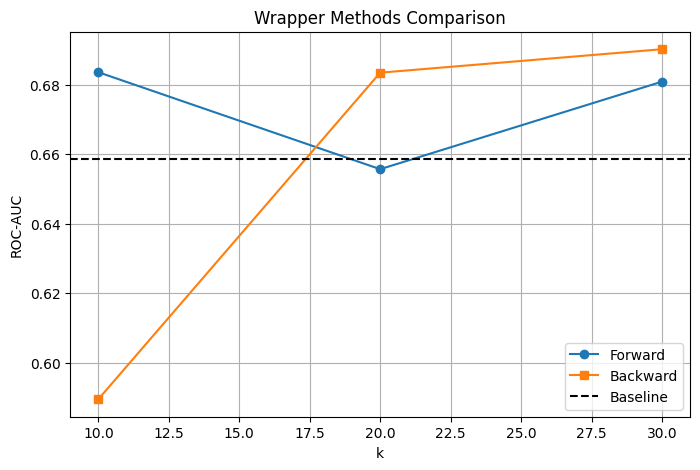

In [53]:
plt.figure(figsize=(8,5))
plt.plot(results_forward["k"], results_forward["ROC-AUC"],
         marker='o', label='Forward')

plt.plot(results_backward["k"], results_backward["ROC-AUC"],
         marker='s', label='Backward')

plt.axhline(y=roc_baseline, linestyle='--', color='black',
            label='Baseline')

plt.xlabel("k")
plt.ylabel("ROC-AUC")
plt.title("Wrapper Methods Comparison")
plt.legend()
plt.grid(True)
plt.show()

Backward selekcija pokazuje da performanse značajno rastu sa povećanjem broja atributa, za k=20 i k=30 model nadmašuje baseline, dok je za k=10 rezultat znatno slabiji. Ovo ukazuje da uklanjanje atributa iz većeg početnog skupa može biti efikasnije od forward pristupa kod visoko-dimenzionalnih podataka poput SECOM-a.

## RFE (Recursive Feature Elimination)

In [54]:
from sklearn.feature_selection import RFE

k_values = [20, 50, 100, 150]
results_rfe = []

for k in k_values:
    pipe_rfe = Pipeline([
        ('imputer',  SimpleImputer(strategy='median')),
        ('variance', VarianceThreshold(threshold=0.01)),
        ('scaler',   StandardScaler()),
        ('rfe',      RFE(
                        estimator=LogisticRegression(
                            class_weight='balanced', max_iter=1000),
                        n_features_to_select=k,
                        step=10)),        
        ('model',    LogisticRegression(class_weight='balanced', max_iter=1000))
    ])
    
    roc = cross_val_score(pipe_rfe, X, y, cv=cv, scoring='roc_auc').mean()
    ap  = cross_val_score(pipe_rfe, X, y, cv=cv, scoring='average_precision').mean()
    bal = cross_val_score(pipe_rfe, X, y, cv=cv, scoring='balanced_accuracy').mean()
    
    results_rfe.append((k, roc, ap, bal))
    print(f"k={k} ✓  ROC-AUC={roc:.4f}  AP={ap:.4f}  Bal={bal:.4f}")

results_rfe = pd.DataFrame(results_rfe,
                            columns=["k", "ROC-AUC", "AP", "Balanced Acc"])
print("\nRFE REZULTATI:")
print(results_rfe)

k=20 ✓  ROC-AUC=0.6551  AP=0.1817  Bal=0.6536
k=50 ✓  ROC-AUC=0.6513  AP=0.1532  Bal=0.6284
k=100 ✓  ROC-AUC=0.6745  AP=0.1385  Bal=0.5867
k=150 ✓  ROC-AUC=0.6610  AP=0.1445  Bal=0.5741

RFE REZULTATI:
     k   ROC-AUC        AP  Balanced Acc
0   20  0.655064  0.181661      0.653561
1   50  0.651265  0.153237      0.628415
2  100  0.674459  0.138522      0.586748
3  150  0.661017  0.144496      0.574111


RFE metoda nije ostvarila bolje performanse od filter metoda, pri čemu je najbolji ROC-AUC postignut za k=100, ali uz smanjenje Balanced Accuracy. U kontekstu SECOM skupa podataka, jednostavne filter metode pokazale su veću stabilnost i efikasnost u selekciji atributa.

### RFE vs Baseline

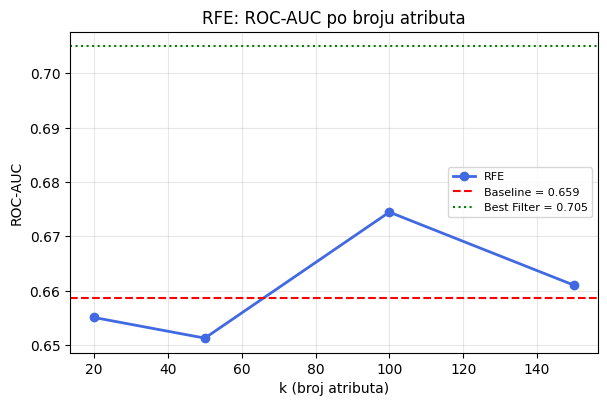

In [55]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(16, 10))
gs  = gridspec.GridSpec(2, 2, figure=fig, hspace=0.4, wspace=0.35)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(results_rfe["k"], results_rfe["ROC-AUC"],
         marker='o', linewidth=2, color='royalblue', label='RFE')
ax1.axhline(y=roc_baseline, color='red', linestyle='--',
            linewidth=1.5, label=f'Baseline = {roc_baseline:.3f}')
ax1.axhline(y=results_corr["ROC-AUC"].max(), color='green', linestyle=':',
            linewidth=1.5, label=f'Best Filter = {results_corr["ROC-AUC"].max():.3f}')
ax1.set_title("RFE: ROC-AUC po broju atributa")
ax1.set_xlabel("k (broj atributa)")
ax1.set_ylabel("ROC-AUC")
ax1.legend(fontsize=8)
ax1.grid(True, alpha=0.3)

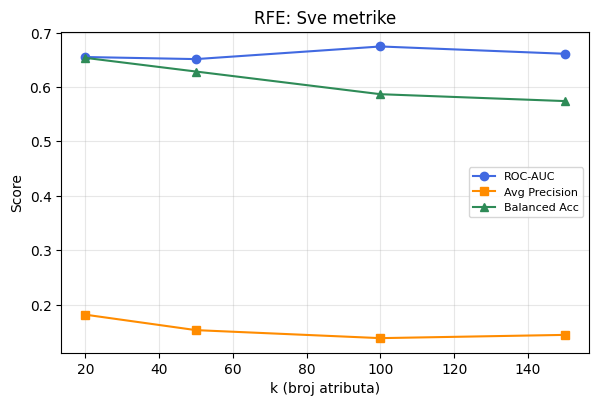

In [56]:
fig = plt.figure(figsize=(16, 10))
gs  = gridspec.GridSpec(2, 2, figure=fig, hspace=0.4, wspace=0.35)

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(results_rfe["k"], results_rfe["ROC-AUC"],
         marker='o', label='ROC-AUC', color='royalblue')
ax2.plot(results_rfe["k"], results_rfe["AP"],
         marker='s', label='Avg Precision', color='darkorange')
ax2.plot(results_rfe["k"], results_rfe["Balanced Acc"],
         marker='^', label='Balanced Acc', color='seagreen')
ax2.set_title("RFE: Sve metrike")
ax2.set_xlabel("k (broj atributa)")
ax2.set_ylabel("Score")
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)

### Top 20 feature-a selektovanih RFE

In [57]:
pipe_rfe.fit(X, y)

rfe_step = pipe_rfe.named_steps['rfe']

imputer = SimpleImputer(strategy='median')
X_imp = imputer.fit_transform(X)

var = VarianceThreshold(threshold=0.01)
X_var = var.fit_transform(X_imp)

feature_names = X.columns[var.get_support()]

selected_features = feature_names[rfe_step.support_]

print("Top RFE atributi:")
print(selected_features)

Top RFE atributi:
Index(['2', '6', '14', '15', '16', '19', '21', '22', '25', '26',
       ...
       '555', '556', '563', '564', '566', '568', '572', '574', '576', '577'],
      dtype='str', length=150)


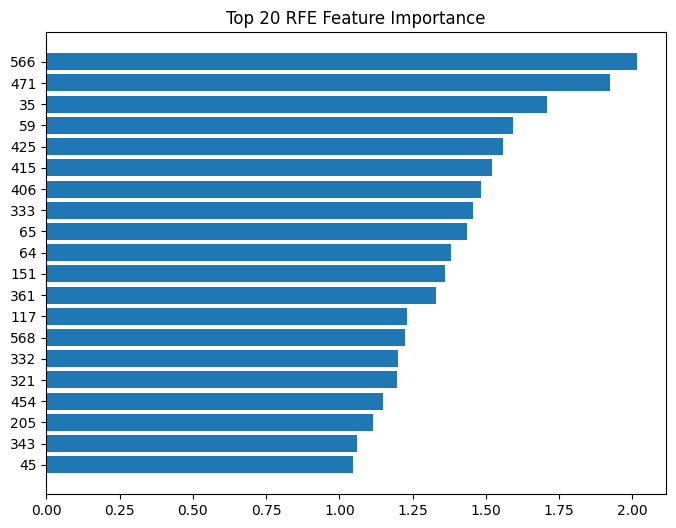

In [58]:
coefs = np.abs(rfe_step.estimator_.coef_[0])

rfe_df = pd.DataFrame({
    "feature": selected_features,
    "importance": coefs
}).sort_values("importance", ascending=False)

top20 = rfe_df.head(20)

plt.figure(figsize=(8,6))
plt.barh(top20["feature"], top20["importance"])
plt.gca().invert_yaxis()
plt.title("Top 20 RFE Feature Importance")
plt.show()

## RFECV (Recursive Feature Elimination with Cross-Validation)

In [59]:
from sklearn.feature_selection import RFECV

pipe_rfecv = Pipeline([
    ('imputer',  SimpleImputer(strategy='median')),
    ('variance', VarianceThreshold(threshold=0.01)),
    ('scaler',   StandardScaler()),
    ('rfecv',    RFECV(
                    estimator=LogisticRegression(
                        class_weight='balanced', max_iter=1000),
                    cv=StratifiedKFold(5, shuffle=True, random_state=42),
                    scoring='roc_auc',
                    step=10,         
                    min_features_to_select=10,
                    n_jobs=-1)),   
    ('model',    LogisticRegression(class_weight='balanced', max_iter=1000))
])

pipe_rfecv.fit(X, y)

rfecv_step     = pipe_rfecv.named_steps['rfecv']
optimal_k      = rfecv_step.n_features_
cv_scores      = rfecv_step.cv_results_['mean_test_score']
cv_scores_std  = rfecv_step.cv_results_['std_test_score']

print(f"Optimalni broj atributa: {optimal_k}")
print(f"Best CV ROC-AUC: {cv_scores.max():.4f}")

roc_rfecv = cross_val_score(pipe_rfecv, X, y, cv=cv, scoring='roc_auc').mean()
ap_rfecv  = cross_val_score(pipe_rfecv, X, y, cv=cv, scoring='average_precision').mean()
bal_rfecv = cross_val_score(pipe_rfecv, X, y, cv=cv, scoring='balanced_accuracy').mean()

print("\nRFECV REZULTATI:")
print(f"  Optimalni k  = {optimal_k}")
print(f"  ROC-AUC      = {roc_rfecv:.4f}")
print(f"  AP           = {ap_rfecv:.4f}")
print(f"  Balanced Acc = {bal_rfecv:.4f}")

Optimalni broj atributa: 44
Best CV ROC-AUC: 0.6811

RFECV REZULTATI:
  Optimalni k  = 44
  ROC-AUC      = 0.6472
  AP           = 0.1671
  Balanced Acc = 0.5982


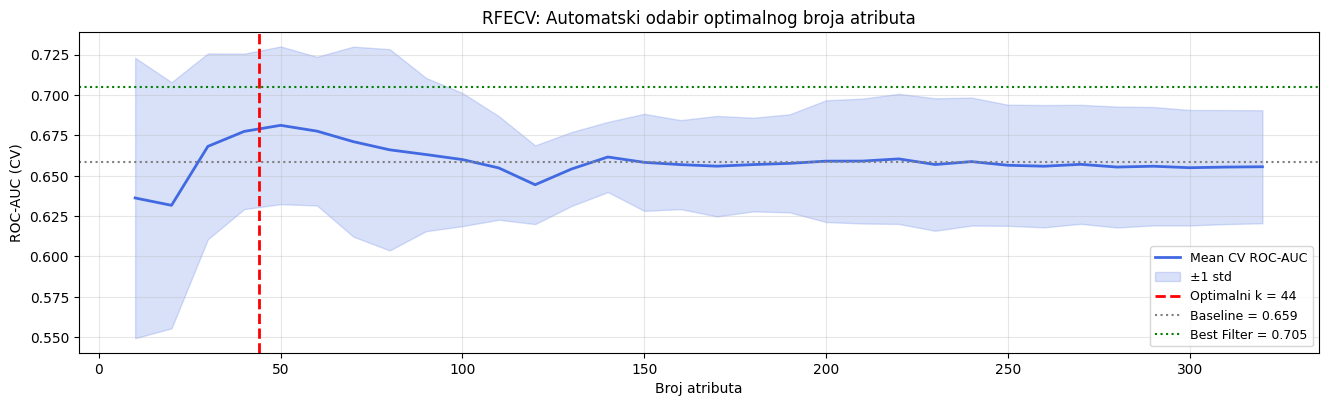

In [60]:

fig = plt.figure(figsize=(16, 10))
gs  = gridspec.GridSpec(2, 2, figure=fig, hspace=0.4, wspace=0.35)

n_features_range = range(rfecv_step.min_features_to_select,
                          len(cv_scores) * 10 + rfecv_step.min_features_to_select,
                          10)
n_features_range = list(n_features_range)[:len(cv_scores)]

ax1 = fig.add_subplot(gs[0, :]) 

ax1.plot(n_features_range, cv_scores,
         color='royalblue', linewidth=2, label='Mean CV ROC-AUC')
ax1.fill_between(n_features_range,
                 cv_scores - cv_scores_std,
                 cv_scores + cv_scores_std,
                 alpha=0.2, color='royalblue', label='±1 std')

ax1.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2,
            label=f'Optimalni k = {optimal_k}')
ax1.axhline(y=roc_baseline, color='gray', linestyle=':', linewidth=1.5,
            label=f'Baseline = {roc_baseline:.3f}')
ax1.axhline(y=results_corr["ROC-AUC"].max(), color='green', linestyle=':',
            linewidth=1.5, label=f'Best Filter = {results_corr["ROC-AUC"].max():.3f}')

ax1.set_xlabel("Broj atributa")
ax1.set_ylabel("ROC-AUC (CV)")
ax1.set_title("RFECV: Automatski odabir optimalnog broja atributa")
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

### Top 20 feature-a selektovanih RFECV

In [61]:

rfecv = pipe_rfecv.named_steps['rfecv']

mask = rfecv.support_

imputer = SimpleImputer(strategy='median')
X_imp = imputer.fit_transform(X)

var = VarianceThreshold(threshold=0.01)
X_var = var.fit_transform(X_imp)

feature_names = X.columns[var.get_support()]
selected_features = feature_names[mask]

print("Broj selektovanih:", len(selected_features))
print("\nTop 20 RFECV feature-a:")
print(selected_features[:20])


Broj selektovanih: 44

Top 20 RFECV feature-a:
Index(['25', '26', '34', '35', '36', '59', '64', '65', '96', '98', '111',
       '117', '142', '155', '161', '188', '204', '205', '277', '283'],
      dtype='str')


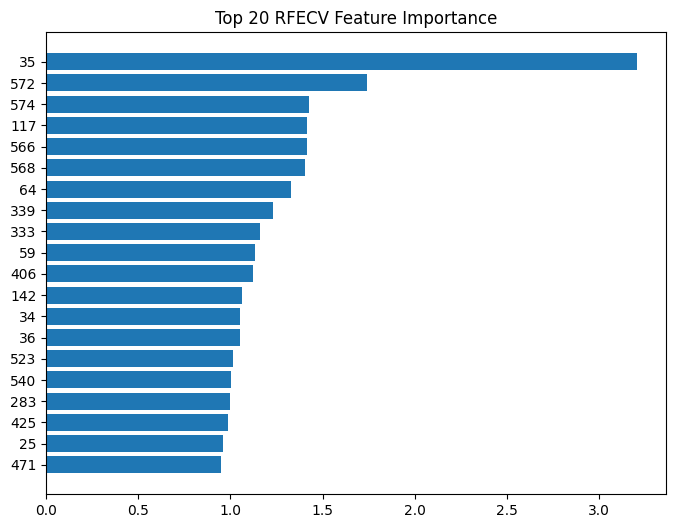

In [62]:
coefs = np.abs(rfecv.estimator_.coef_[0])

rfecv_df = pd.DataFrame({
    "feature": selected_features,
    "importance": coefs
}).sort_values("importance", ascending=False)

top20 = rfecv_df.head(20)

plt.figure(figsize=(8,6))
plt.barh(top20["feature"], top20["importance"])
plt.gca().invert_yaxis()
plt.title("Top 20 RFECV Feature Importance")
plt.show()

### Poređenje svih metoda

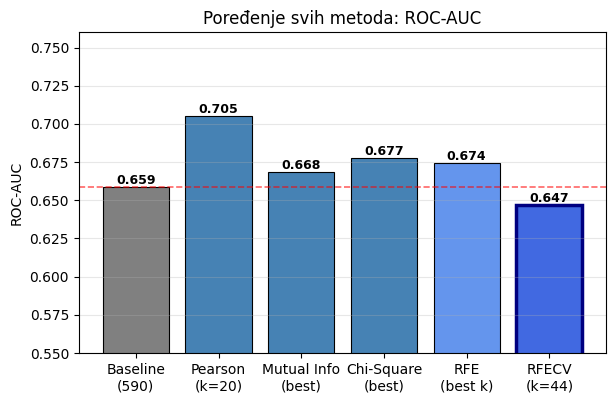

In [63]:

fig = plt.figure(figsize=(16, 10))
gs  = gridspec.GridSpec(2, 2, figure=fig, hspace=0.4, wspace=0.35)

ax2 = fig.add_subplot(gs[1, 0])

methods = ['Baseline\n(590)', 'Pearson\n(k=20)', 'Mutual Info\n(best)',
           'Chi-Square\n(best)', 'RFE\n(best k)', f'RFECV\n(k={optimal_k})']

roc_values = [
    roc_baseline,
    results_corr["ROC-AUC"].max(),
    results_mi["ROC-AUC"].max(),
    results_chi2["ROC-AUC"].max(),
    results_rfe["ROC-AUC"].max(),
    roc_rfecv
]

colors = ['gray', 'steelblue', 'steelblue', 'steelblue', 'cornflowerblue', 'royalblue']
bars   = ax2.bar(methods, roc_values, color=colors, edgecolor='black', linewidth=0.8)
bars[-1].set_edgecolor('navy')
bars[-1].set_linewidth(2.5)

for bar, val in zip(bars, roc_values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002,
             f'{val:.3f}', ha='center', fontsize=9, fontweight='bold')

ax2.axhline(y=roc_baseline, color='red', linestyle='--', linewidth=1.2, alpha=0.6)
ax2.set_ylim(0.55, 0.76)
ax2.set_ylabel("ROC-AUC")
ax2.set_title("Poređenje svih metoda: ROC-AUC")
ax2.grid(True, alpha=0.3, axis='y')

# 3. Embedded metode

## REGULARIZACIJA

### L1 Logistic Regression (Lasso)

In [64]:
from sklearn.feature_selection import SelectFromModel
results_l1 = []
C_values = [0.01, 0.1, 0.5, 1.0] 

for c in C_values:
    pipe_l1 = Pipeline([
        ('imputer',  SimpleImputer(strategy='median')),
        ('variance', VarianceThreshold(threshold=0.01)),
        ('scaler',   StandardScaler()),
        ('selector', SelectFromModel(
                        LogisticRegression(
                            solver='saga',
                            l1_ratio=1.0,       # 1.0 = L1 (Lasso)
                            C=c,
                            class_weight='balanced',
                            max_iter=2000,
                            tol=1e-3))),
        ('model',    LogisticRegression(
                            class_weight='balanced',
                            max_iter=1000))
    ])
    
    try:
        roc = cross_val_score(pipe_l1, X, y, cv=cv, scoring='roc_auc').mean()
        ap  = cross_val_score(pipe_l1, X, y, cv=cv, scoring='average_precision').mean()
        bal = cross_val_score(pipe_l1, X, y, cv=cv, scoring='balanced_accuracy').mean()
        
        pipe_l1.fit(X, y)
        n_sel = pipe_l1.named_steps['selector'].get_support().sum()
        
        results_l1.append((c, n_sel, roc, ap, bal))
        print(f"C={c}  features={n_sel}  ROC={roc:.4f}  AP={ap:.4f}  Bal={bal:.4f}")
    except ValueError as e:
        print(f"C={c}  PRESKOČENO: {e}")

results_l1 = pd.DataFrame(results_l1,
    columns=["C", "N_features", "ROC-AUC", "AP", "Balanced Acc"])
print("\nL1 REZULTATI:")
print(results_l1)

C=0.01  features=8  ROC=0.7139  AP=0.1824  Bal=0.6715
C=0.1  features=153  ROC=0.6463  AP=0.1169  Bal=0.5671
C=0.5  features=265  ROC=0.6538  AP=0.1343  Bal=0.5486
C=1.0  features=285  ROC=0.6511  AP=0.1377  Bal=0.5554

L1 REZULTATI:
      C  N_features   ROC-AUC        AP  Balanced Acc
0  0.01           8  0.713910  0.182441      0.671453
1  0.10         153  0.646253  0.116904      0.567101
2  0.50         265  0.653778  0.134321      0.548598
3  1.00         285  0.651132  0.137692      0.555406


### L2 Ridge

In [65]:
results_l2 = []
C_values_l2 = [0.01, 0.1, 0.5, 1.0]

for c in C_values_l2:
    pipe_l2 = Pipeline([
        ('imputer',  SimpleImputer(strategy='median')),
        ('variance', VarianceThreshold(threshold=0.01)),
        ('scaler',   StandardScaler()),
        ('selector', SelectFromModel(
                        LogisticRegression(
                            solver='lbfgs',
                            l1_ratio=0.0,       # 0.0 = L2 (Ridge)
                            C=c,
                            class_weight='balanced',
                            max_iter=1000),
                        max_features=50)),     
        ('model',    LogisticRegression(
                            class_weight='balanced',
                            max_iter=1000))
    ])
    
    roc = cross_val_score(pipe_l2, X, y, cv=cv, scoring='roc_auc').mean()
    ap  = cross_val_score(pipe_l2, X, y, cv=cv, scoring='average_precision').mean()
    bal = cross_val_score(pipe_l2, X, y, cv=cv, scoring='balanced_accuracy').mean()
    
    results_l2.append((c, roc, ap, bal))
    print(f"C={c}  ROC={roc:.4f}  AP={ap:.4f}  Bal={bal:.4f}")

results_l2 = pd.DataFrame(results_l2,
    columns=["C", "ROC-AUC", "AP", "Balanced Acc"])
print("\nL2 REZULTATI:")
print(results_l2)

C=0.01  ROC=0.6271  AP=0.1210  Bal=0.5735
C=0.1  ROC=0.6688  AP=0.1367  Bal=0.6150
C=0.5  ROC=0.6897  AP=0.1493  Bal=0.6268
C=1.0  ROC=0.6870  AP=0.1620  Bal=0.6341

L2 REZULTATI:
      C   ROC-AUC        AP  Balanced Acc
0  0.01  0.627125  0.120956      0.573504
1  0.10  0.668813  0.136721      0.614982
2  0.50  0.689679  0.149291      0.626759
3  1.00  0.687012  0.162003      0.634146


### Elastic Net

In [66]:
results_enet = []
params = [(0.15, 0.1), (0.5, 0.1), (0.85, 0.1), (0.5, 0.5), (0.5, 1.0)]

for ratio, c in params:
    pipe_en = Pipeline([
        ('imputer',  SimpleImputer(strategy='median')),
        ('variance', VarianceThreshold(threshold=0.01)),
        ('scaler',   StandardScaler()),
        ('selector', SelectFromModel(
                        LogisticRegression(
                            solver='saga',
                            l1_ratio=ratio,     # izmedju 0 i 1
                            C=c,
                            class_weight='balanced',
                            max_iter=2000,
                            tol=1e-3))),
        ('model',    LogisticRegression(
                            class_weight='balanced',
                            max_iter=1000))
    ])
    
    try:
        roc = cross_val_score(pipe_en, X, y, cv=cv, scoring='roc_auc').mean()
        ap  = cross_val_score(pipe_en, X, y, cv=cv, scoring='average_precision').mean()
        bal = cross_val_score(pipe_en, X, y, cv=cv, scoring='balanced_accuracy').mean()
        
        pipe_en.fit(X, y)
        n_sel = pipe_en.named_steps['selector'].get_support().sum()
        
        results_enet.append((ratio, c, n_sel, roc, ap, bal))
        print(f"l1_ratio={ratio}  C={c}  features={n_sel}  ROC={roc:.4f}  AP={ap:.4f}")
    except ValueError:
        print(f"l1_ratio={ratio}  C={c}  PRESKOČENO: 0 feature-a selektovano")

results_enet = pd.DataFrame(results_enet,
    columns=["l1_ratio", "C", "N_features", "ROC-AUC", "AP", "Balanced Acc"])
print("\nELASTIC NET REZULTATI:")
print(results_enet)

l1_ratio=0.15  C=0.1  features=130  ROC=0.6538  AP=0.1302
l1_ratio=0.5  C=0.1  features=109  ROC=0.6494  AP=0.1271
l1_ratio=0.85  C=0.1  features=100  ROC=0.6489  AP=0.1168
l1_ratio=0.5  C=0.5  features=130  ROC=0.6555  AP=0.1307
l1_ratio=0.5  C=1.0  features=126  ROC=0.6600  AP=0.1346

ELASTIC NET REZULTATI:
   l1_ratio    C  N_features   ROC-AUC        AP  Balanced Acc
0      0.15  0.1         130  0.653766  0.130158      0.573930
1      0.50  0.1         109  0.649353  0.127063      0.546789
2      0.85  0.1         100  0.648860  0.116761      0.570860
3      0.50  0.5         130  0.655534  0.130678      0.565431
4      0.50  1.0         126  0.659954  0.134650      0.587935


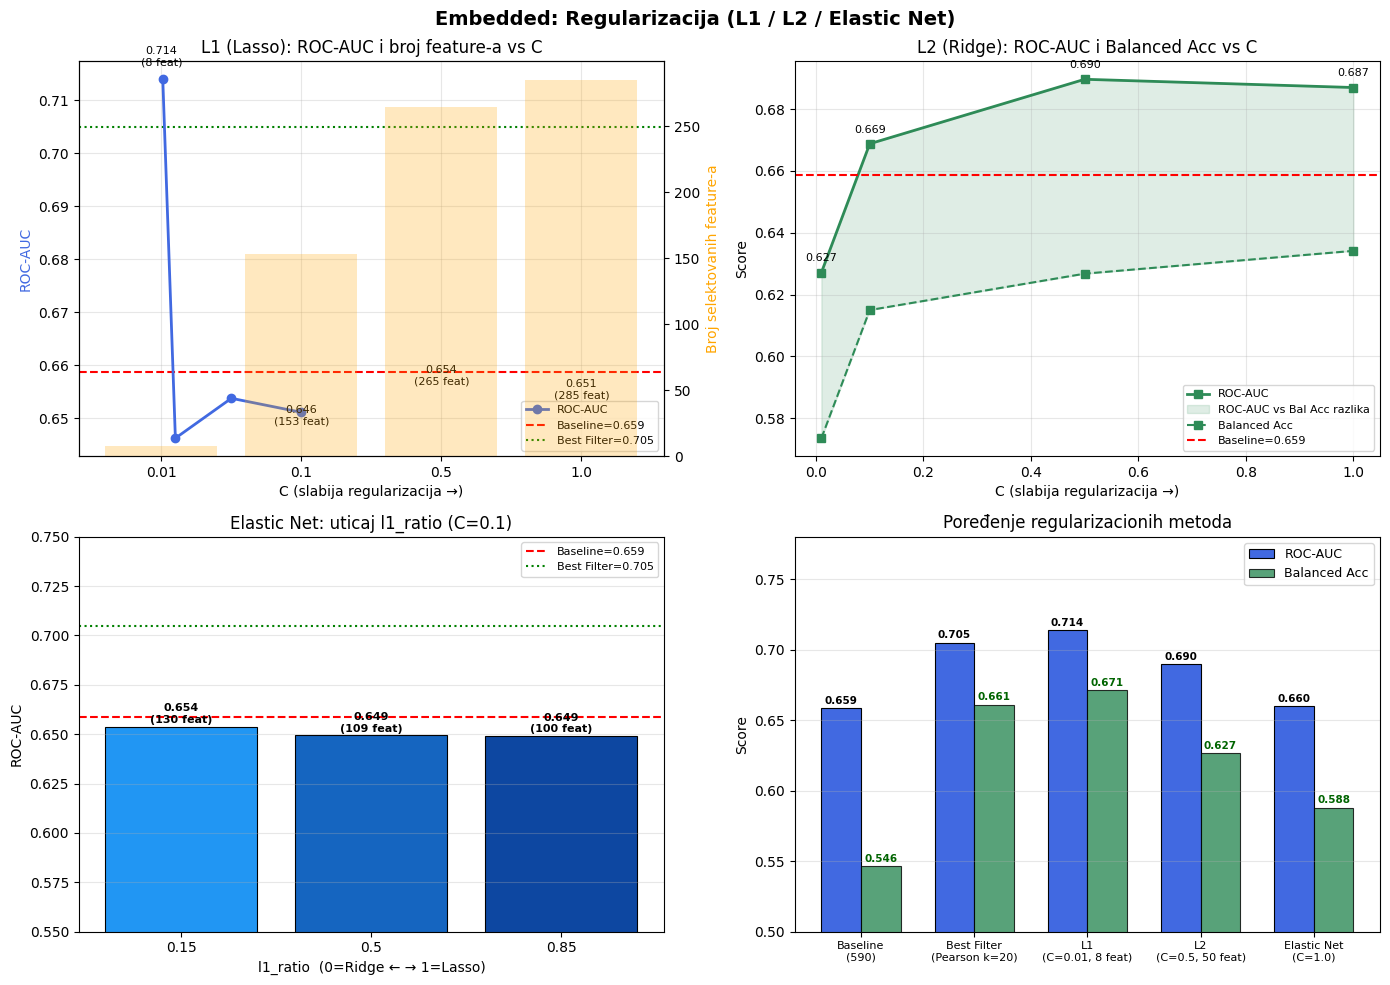

In [67]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# L1: ROC-AUC vs C
ax1 = axes[0, 0]
ax1b = ax1.twinx()

ax1.plot(results_l1["C"], results_l1["ROC-AUC"],
         marker='o', color='royalblue', linewidth=2, label='ROC-AUC', zorder=3)
ax1b.bar(range(len(results_l1)), results_l1["N_features"],
         alpha=0.25, color='orange', label='Broj feature-a')
ax1b.set_xticks(range(len(results_l1)))
ax1b.set_xticklabels(results_l1["C"].astype(str))

ax1.axhline(y=roc_baseline, color='red', linestyle='--',
            linewidth=1.5, label=f'Baseline={roc_baseline:.3f}')
ax1.axhline(y=results_corr["ROC-AUC"].max(), color='green', linestyle=':',
            linewidth=1.5, label=f'Best Filter={results_corr["ROC-AUC"].max():.3f}')

for i, row in results_l1.iterrows():
    ax1.annotate(f"{row['ROC-AUC']:.3f}\n({int(row['N_features'])} feat)",
                 (i, row['ROC-AUC']), textcoords="offset points",
                 xytext=(0, 10), ha='center', fontsize=8)

ax1.set_xlabel("C (slabija regularizacija →)")
ax1.set_ylabel("ROC-AUC", color='royalblue')
ax1b.set_ylabel("Broj selektovanih feature-a", color='orange')
ax1.set_title("L1 (Lasso): ROC-AUC i broj feature-a vs C")
ax1.legend(loc='lower right', fontsize=8)
ax1.grid(True, alpha=0.3)

# L2: ROC-AUC vs C
ax2 = axes[0, 1]
ax2.plot(results_l2["C"], results_l2["ROC-AUC"],
         marker='s', color='seagreen', linewidth=2, label='ROC-AUC')
ax2.fill_between(results_l2["C"],
                 results_l2["Balanced Acc"],
                 results_l2["ROC-AUC"],
                 alpha=0.15, color='seagreen', label='ROC-AUC vs Bal Acc razlika')
ax2.plot(results_l2["C"], results_l2["Balanced Acc"],
         marker='s', color='seagreen', linewidth=1.5,
         linestyle='--', label='Balanced Acc')
ax2.axhline(y=roc_baseline, color='red', linestyle='--',
            linewidth=1.5, label=f'Baseline={roc_baseline:.3f}')

for i, row in results_l2.iterrows():
    ax2.annotate(f"{row['ROC-AUC']:.3f}",
                 (row['C'], row['ROC-AUC']),
                 textcoords="offset points", xytext=(0, 8),
                 ha='center', fontsize=8)

ax2.set_xlabel("C (slabija regularizacija →)")
ax2.set_ylabel("Score")
ax2.set_title("L2 (Ridge): ROC-AUC i Balanced Acc vs C")
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)

# Elastic Net: ROC-AUC 
ax3 = axes[1, 0]
enet_c01 = results_enet[results_enet["C"] == 0.1].copy()
ratios = enet_c01["l1_ratio"].astype(str)
bars = ax3.bar(ratios, enet_c01["ROC-AUC"],
               color=['#2196F3', '#1565C0', '#0D47A1'],
               edgecolor='black', linewidth=0.8)
ax3.axhline(y=roc_baseline, color='red', linestyle='--',
            linewidth=1.5, label=f'Baseline={roc_baseline:.3f}')
ax3.axhline(y=results_corr["ROC-AUC"].max(), color='green', linestyle=':',
            linewidth=1.5, label=f'Best Filter={results_corr["ROC-AUC"].max():.3f}')

for bar, (_, row) in zip(bars, enet_c01.iterrows()):
    ax3.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.002,
             f"{row['ROC-AUC']:.3f}\n({int(row['N_features'])} feat)",
             ha='center', fontsize=8, fontweight='bold')

ax3.set_xlabel("l1_ratio  (0=Ridge ← → 1=Lasso)")
ax3.set_ylabel("ROC-AUC")
ax3.set_title("Elastic Net: uticaj l1_ratio (C=0.1)")
ax3.set_ylim(0.55, 0.75)
ax3.legend(fontsize=8)
ax3.grid(True, alpha=0.3, axis='y')

# L1 vs L2 vs ElasticNet vs Filter best
ax4 = axes[1, 1]

compare_methods = [
    'Baseline\n(590)',
    f'Best Filter\n(Pearson k=20)',
    f'L1\n(C=0.01, 8 feat)',
    f'L2\n(C=0.5, 50 feat)',
    f'Elastic Net\n(C=1.0)',
]
compare_roc = [
    roc_baseline,
    results_corr["ROC-AUC"].max(),
    results_l1["ROC-AUC"].max(),
    results_l2["ROC-AUC"].max(),
    results_enet["ROC-AUC"].max(),
]
compare_bal = [
    bal_acc_baseline,
    results_corr.loc[results_corr["ROC-AUC"].idxmax(), "Balanced Acc"],
    results_l1.loc[results_l1["ROC-AUC"].idxmax(), "Balanced Acc"],
    results_l2.loc[results_l2["ROC-AUC"].idxmax(), "Balanced Acc"],
    results_enet.loc[results_enet["ROC-AUC"].idxmax(), "Balanced Acc"],
]

x = np.arange(len(compare_methods))
width = 0.35
bars1 = ax4.bar(x - width/2, compare_roc, width,
                label='ROC-AUC', color='royalblue',
                edgecolor='black', linewidth=0.8)
bars2 = ax4.bar(x + width/2, compare_bal, width,
                label='Balanced Acc', color='seagreen',
                alpha=0.8, edgecolor='black', linewidth=0.8)

for bar in bars1:
    ax4.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.003,
             f'{bar.get_height():.3f}',
             ha='center', fontsize=7.5, fontweight='bold')
for bar in bars2:
    ax4.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.003,
             f'{bar.get_height():.3f}',
             ha='center', fontsize=7.5, fontweight='bold', color='darkgreen')

ax4.set_xticks(x)
ax4.set_xticklabels(compare_methods, fontsize=8)
ax4.set_ylim(0.50, 0.78)
ax4.set_ylabel("Score")
ax4.set_title("Poređenje regularizacionih metoda")
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3, axis='y')

plt.suptitle("Embedded: Regularizacija (L1 / L2 / Elastic Net)",
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

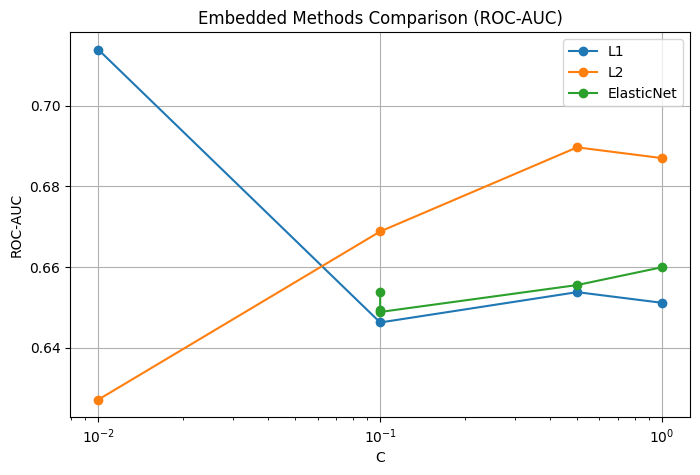

In [68]:
plt.figure(figsize=(8,5))

plt.plot(results_l1["C"], results_l1["ROC-AUC"], marker='o', label="L1")
plt.plot(results_l2["C"], results_l2["ROC-AUC"], marker='o', label="L2")
plt.plot(results_enet["C"], results_enet["ROC-AUC"], marker='o', label="ElasticNet")

plt.xscale("log")
plt.legend()
plt.title("Embedded Methods Comparison (ROC-AUC)")
plt.xlabel("C")
plt.ylabel("ROC-AUC")
plt.grid(True)
plt.show()

### Decision Tree Importance

In [69]:
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

results_dt = []

for k in k_values:
    pipe_dt = Pipeline([
        ('imputer',  SimpleImputer(strategy='median')),
        ('variance', VarianceThreshold(threshold=0.01)),
        ('selector', SelectFromModel(
                        DecisionTreeClassifier(
                            class_weight='balanced',
                            random_state=42),
                        max_features=k)),
        ('model',    LogisticRegression(class_weight='balanced', max_iter=5000, solver= 'saga'))
    ])
    
    roc = cross_val_score(pipe_dt, X, y, cv=cv, scoring='roc_auc').mean()
    ap  = cross_val_score(pipe_dt, X, y, cv=cv, scoring='average_precision').mean()
    bal = cross_val_score(pipe_dt, X, y, cv=cv, scoring='balanced_accuracy').mean()
    
    results_dt.append((k, roc, ap, bal))
    print(f"k={k}  ROC={roc:.4f}  AP={ap:.4f}  Bal={bal:.4f}")

results_dt = pd.DataFrame(results_dt,
    columns=["k", "ROC-AUC", "AP", "Balanced Acc"])
print("\nDECISION TREE IMPORTANCE:")
print(results_dt)

k=20  ROC=0.6892  AP=0.2061  Bal=0.6493
k=50  ROC=0.6780  AP=0.1949  Bal=0.6265
k=100  ROC=0.6790  AP=0.1947  Bal=0.6299
k=150  ROC=0.6803  AP=0.1947  Bal=0.6285

DECISION TREE IMPORTANCE:
     k   ROC-AUC        AP  Balanced Acc
0   20  0.689215  0.206052      0.649322
1   50  0.678033  0.194909      0.626458
2  100  0.679011  0.194747      0.629899
3  150  0.680349  0.194740      0.628529


#### Gini vs Entropy vs Log_loss

In [70]:
results_criteria = []

for criterion in ['gini', 'entropy', 'log_loss']:
    for k in k_values:
        pipe_crit = Pipeline([
            ('imputer',  SimpleImputer(strategy='median')),
            ('variance', VarianceThreshold(threshold=0.01)),
            ('selector', SelectFromModel(
                            DecisionTreeClassifier(
                                criterion=criterion,
                                class_weight='balanced',
                                random_state=42),
                            max_features=k)),
            ('model',    LogisticRegression(class_weight='balanced', max_iter=1000))
        ])
        
        roc = cross_val_score(pipe_crit, X, y, cv=cv, scoring='roc_auc').mean()
        ap  = cross_val_score(pipe_crit, X, y, cv=cv, scoring='average_precision').mean()
        bal = cross_val_score(pipe_crit, X, y, cv=cv, scoring='balanced_accuracy').mean()
        
        results_criteria.append((criterion, k, roc, ap, bal))
        print(f"{criterion}  k={k}  ROC={roc:.4f}  AP={ap:.4f}  Bal={bal:.4f}")

results_criteria = pd.DataFrame(results_criteria,
    columns=["Criterion", "k", "ROC-AUC", "AP", "Balanced Acc"])
print("\nGINI vs ENTROPY vs LOG_LOSS:")
print(results_criteria)

gini  k=20  ROC=0.6791  AP=0.2157  Bal=0.6338
gini  k=50  ROC=0.6929  AP=0.1952  Bal=0.6549
gini  k=100  ROC=0.6929  AP=0.1952  Bal=0.6549
gini  k=150  ROC=0.6929  AP=0.1952  Bal=0.6549
entropy  k=20  ROC=0.6724  AP=0.1401  Bal=0.6183
entropy  k=50  ROC=0.6484  AP=0.1360  Bal=0.6144
entropy  k=100  ROC=0.6484  AP=0.1360  Bal=0.6144
entropy  k=150  ROC=0.6484  AP=0.1360  Bal=0.6144
log_loss  k=20  ROC=0.6724  AP=0.1401  Bal=0.6183
log_loss  k=50  ROC=0.6484  AP=0.1360  Bal=0.6144
log_loss  k=100  ROC=0.6484  AP=0.1360  Bal=0.6144
log_loss  k=150  ROC=0.6484  AP=0.1360  Bal=0.6144

GINI vs ENTROPY vs LOG_LOSS:
   Criterion    k   ROC-AUC        AP  Balanced Acc
0       gini   20  0.679078  0.215704      0.633822
1       gini   50  0.692885  0.195194      0.654869
2       gini  100  0.692885  0.195194      0.654869
3       gini  150  0.692885  0.195194      0.654869
4    entropy   20  0.672429  0.140078      0.618307
5    entropy   50  0.648427  0.135961      0.614435
6    entropy  100  0

### Random Forest Importance

In [71]:
from sklearn.ensemble import RandomForestClassifier

results_rf = []

for k in k_values:
    pipe_rf = Pipeline([
        ('imputer',  SimpleImputer(strategy='median')),
        ('variance', VarianceThreshold(threshold=0.01)),
        ('selector', SelectFromModel(
                        RandomForestClassifier(
                            n_estimators=100,
                            class_weight='balanced',
                            random_state=42),
                        max_features=k)),
        ('model',    LogisticRegression(class_weight='balanced', max_iter=1000))
    ])
    
    roc = cross_val_score(pipe_rf, X, y, cv=cv, scoring='roc_auc').mean()
    ap  = cross_val_score(pipe_rf, X, y, cv=cv, scoring='average_precision').mean()
    bal = cross_val_score(pipe_rf, X, y, cv=cv, scoring='balanced_accuracy').mean()
    
    results_rf.append((k, roc, ap, bal))
    print(f"k={k}  ROC={roc:.4f}  AP={ap:.4f}  Bal={bal:.4f}")

results_rf = pd.DataFrame(results_rf,
    columns=["k", "ROC-AUC", "AP", "Balanced Acc"])
print("\nRANDOM FOREST IMPORTANCE:")
print(results_rf)

k=20  ROC=0.7244  AP=0.1884  Bal=0.6787
k=50  ROC=0.6685  AP=0.1649  Bal=0.6506
k=100  ROC=0.6704  AP=0.1731  Bal=0.6279
k=150  ROC=0.6638  AP=0.1667  Bal=0.6190

RANDOM FOREST IMPORTANCE:
     k   ROC-AUC        AP  Balanced Acc
0   20  0.724424  0.188414      0.678745
1   50  0.668521  0.164851      0.650644
2  100  0.670414  0.173104      0.627855
3  150  0.663759  0.166713      0.619009


### XGBoost Importance

In [72]:
from xgboost import XGBClassifier

neg = (y == -1).sum() if -1 in y.values else (y == 0).sum()
pos = (y ==  1).sum()
spw = neg / pos
print(f"scale_pos_weight = {spw:.2f}  (neg/pos ratio)")

results_xgb = []

for k in k_values:
    pipe_xgb = Pipeline([
        ('imputer',  SimpleImputer(strategy='median')),
        ('variance', VarianceThreshold(threshold=0.01)),
        ('selector', SelectFromModel(
                        XGBClassifier(
                            n_estimators=100,
                            scale_pos_weight=spw,
                            random_state=42,
                            eval_metric='logloss',
                            verbosity=0),
                        max_features=k)),
        ('model',    LogisticRegression(class_weight='balanced', max_iter=1000))
    ])
    
    roc = cross_val_score(pipe_xgb, X, y, cv=cv, scoring='roc_auc').mean()
    ap  = cross_val_score(pipe_xgb, X, y, cv=cv, scoring='average_precision').mean()
    bal = cross_val_score(pipe_xgb, X, y, cv=cv, scoring='balanced_accuracy').mean()
    
    results_xgb.append((k, roc, ap, bal))
    print(f"k={k}  ROC={roc:.4f}  AP={ap:.4f}  Bal={bal:.4f}")

results_xgb = pd.DataFrame(results_xgb,
    columns=["k", "ROC-AUC", "AP", "Balanced Acc"])
print("\nXGBOOST IMPORTANCE:")
print(results_xgb)

scale_pos_weight = 14.07  (neg/pos ratio)
k=20  ROC=0.6360  AP=0.1665  Bal=0.6188
k=50  ROC=0.6383  AP=0.1765  Bal=0.6302
k=100  ROC=0.6689  AP=0.1548  Bal=0.6333
k=150  ROC=0.6689  AP=0.1548  Bal=0.6333

XGBOOST IMPORTANCE:
     k   ROC-AUC        AP  Balanced Acc
0   20  0.636009  0.166482      0.618846
1   50  0.638260  0.176531      0.630152
2  100  0.668907  0.154828      0.633332
3  150  0.668907  0.154828      0.633332


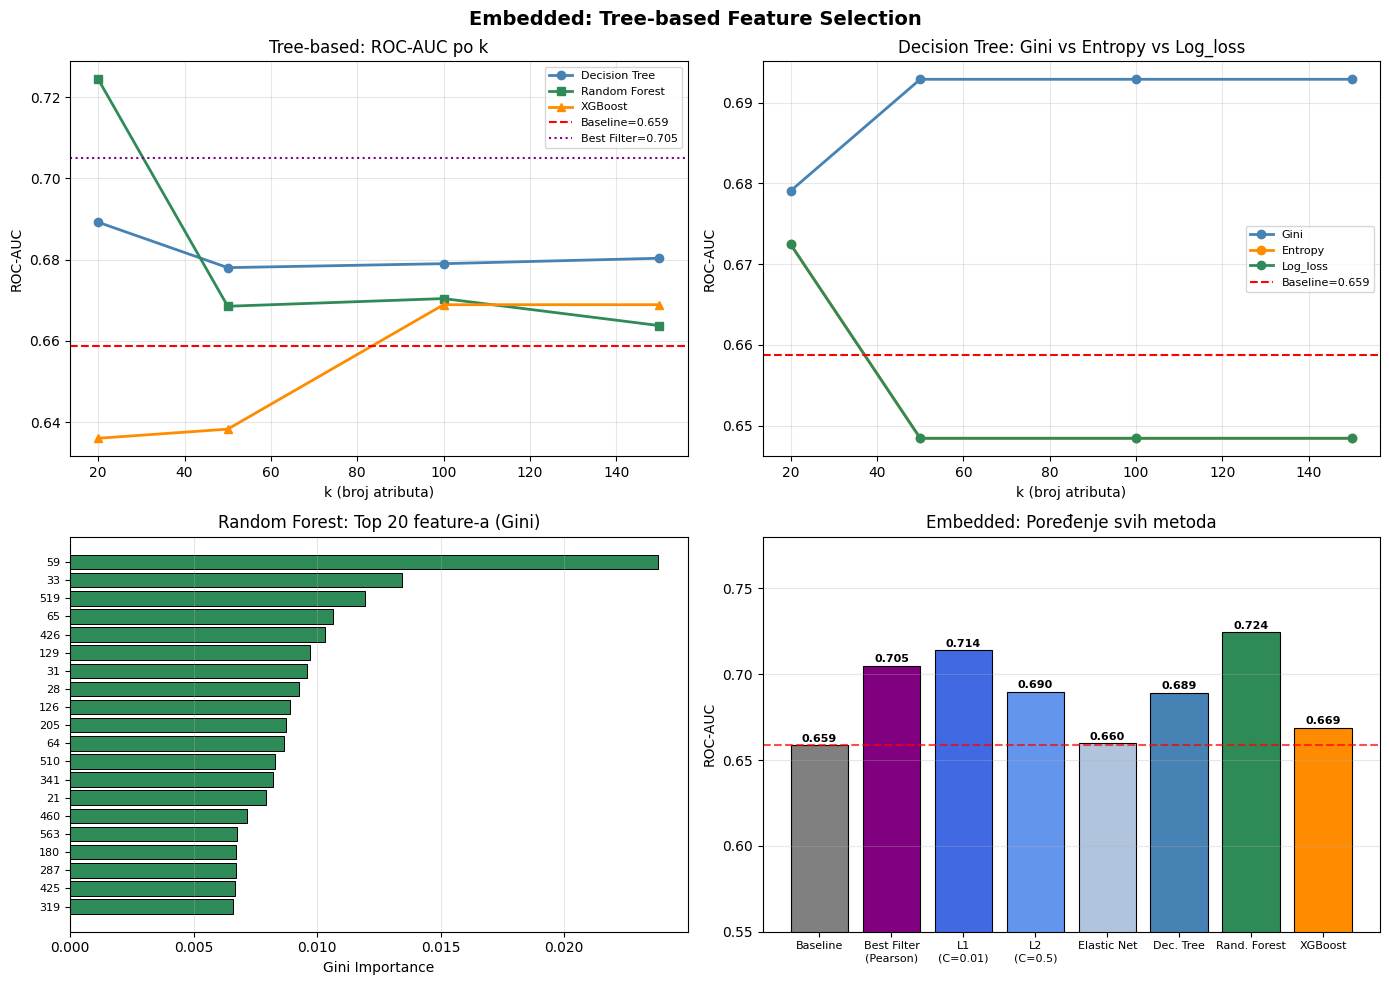

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# DT vs RF vs XGB
ax1 = axes[0, 0]
ax1.plot(results_dt["k"],  results_dt["ROC-AUC"],
         marker='o', linewidth=2, label='Decision Tree', color='steelblue')
ax1.plot(results_rf["k"],  results_rf["ROC-AUC"],
         marker='s', linewidth=2, label='Random Forest', color='seagreen')
ax1.plot(results_xgb["k"], results_xgb["ROC-AUC"],
         marker='^', linewidth=2, label='XGBoost', color='darkorange')
ax1.axhline(y=roc_baseline, color='red', linestyle='--',
            linewidth=1.5, label=f'Baseline={roc_baseline:.3f}')
ax1.axhline(y=results_corr["ROC-AUC"].max(), color='purple', linestyle=':',
            linewidth=1.5, label=f'Best Filter={results_corr["ROC-AUC"].max():.3f}')
ax1.set_xlabel("k (broj atributa)")
ax1.set_ylabel("ROC-AUC")
ax1.set_title("Tree-based: ROC-AUC po k")
ax1.legend(fontsize=8)
ax1.grid(True, alpha=0.3)

#  gini vs entropy vs log_loss 
ax2 = axes[0, 1]
colors_crit = {'gini': 'steelblue', 'entropy': 'darkorange', 'log_loss': 'seagreen'}
for crit in ['gini', 'entropy', 'log_loss']:
    subset = results_criteria[results_criteria["Criterion"] == crit]
    ax2.plot(subset["k"], subset["ROC-AUC"],
             marker='o', linewidth=2,
             label=crit.capitalize(), color=colors_crit[crit])
ax2.axhline(y=roc_baseline, color='red', linestyle='--',
            linewidth=1.5, label=f'Baseline={roc_baseline:.3f}')
ax2.set_xlabel("k (broj atributa)")
ax2.set_ylabel("ROC-AUC")
ax2.set_title("Decision Tree: Gini vs Entropy vs Log_loss")
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)

# feature importance, RF top 20 
ax3 = axes[1, 0]

imp_fit = SimpleImputer(strategy='median').fit(X)
X_imp   = imp_fit.transform(X)
vt_fit  = VarianceThreshold(0.01).fit(X_imp)
X_vt    = vt_fit.transform(X_imp)
feat_names_vt = X.columns[vt_fit.get_support()]

rf_fit = RandomForestClassifier(n_estimators=100,
                                 class_weight='balanced',
                                 random_state=42)
rf_fit.fit(X_vt, y)

importance_df = pd.DataFrame({
    'Feature':    feat_names_vt,
    'Importance': rf_fit.feature_importances_
}).sort_values('Importance', ascending=False).head(20)

ax3.barh(range(20), importance_df['Importance'].values[::-1],
         color='seagreen', edgecolor='black', linewidth=0.7)
ax3.set_yticks(range(20))
ax3.set_yticklabels(importance_df['Feature'].values[::-1], fontsize=8)
ax3.set_xlabel("Gini Importance")
ax3.set_title("Random Forest: Top 20 feature-a (Gini)")
ax3.grid(True, alpha=0.3, axis='x')

# Finalno poredjenje svih embedded metoda
ax4 = axes[1, 1]

all_methods = [
    'Baseline',
    'Best Filter\n(Pearson)',
    'L1\n(C=0.01)',
    'L2\n(C=0.5)',
    'Elastic Net',
    'Dec. Tree',
    'Rand. Forest',
    'XGBoost',
]
all_roc = [
    roc_baseline,
    results_corr["ROC-AUC"].max(),
    results_l1["ROC-AUC"].max(),
    results_l2["ROC-AUC"].max(),
    results_enet["ROC-AUC"].max(),
    results_dt["ROC-AUC"].max(),
    results_rf["ROC-AUC"].max(),
    results_xgb["ROC-AUC"].max(),
]
colors_bar = ['gray', 'purple',
              'royalblue', 'cornflowerblue', 'lightsteelblue',
              'steelblue', 'seagreen', 'darkorange']

bars = ax4.bar(all_methods, all_roc, color=colors_bar,
               edgecolor='black', linewidth=0.8)
ax4.axhline(y=roc_baseline, color='red', linestyle='--',
            linewidth=1.5, alpha=0.7)
for bar, val in zip(bars, all_roc):
    ax4.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.002,
             f'{val:.3f}', ha='center', fontsize=8, fontweight='bold')
ax4.set_ylim(0.55, 0.78)
ax4.set_ylabel("ROC-AUC")
ax4.set_title("Embedded: Poređenje svih metoda")
ax4.tick_params(axis='x', labelsize=8)
ax4.grid(True, alpha=0.3, axis='y')

plt.suptitle("Embedded: Tree-based Feature Selection",
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Stabilnost selekcije

#### Prikupljanje selektovanih feature-a iz svake metode

In [74]:

# Target Correlation (k=20)
pipe_corr_k20 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('variance', VarianceThreshold(threshold=0.01)),
    ('pearson', PearsonSelector(k=20)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced', max_iter=1000))
])
pipe_corr_k20.fit(X, y)
corr_features = set(
    X.columns[pipe_corr_k20.named_steps['variance'].get_support()][
        pipe_corr_k20.named_steps['pearson'].indices_
    ]
)

# ANOVA (k=20) 
pipe_anova_k20 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('variance', VarianceThreshold(threshold=0.01)),
    ('anova', SelectKBest(score_func=f_classif, k=20)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced', max_iter=1000))
])
pipe_anova_k20.fit(X, y)
anova_features = set(
    X.columns[pipe_anova_k20.named_steps['variance'].get_support()][
        pipe_anova_k20.named_steps['anova'].get_support(indices=True)
    ]
)

# Mutual Information (k=100)
pipe_mi_k100 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('variance', VarianceThreshold(threshold=0.01)),
    ('mi', SelectKBest(
        score_func=lambda X, y: mutual_info_classif(X, y, random_state=42),
        k=100)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced', max_iter=1000))
])
pipe_mi_k100.fit(X, y)
mi_features = set(
    X.columns[pipe_mi_k100.named_steps['variance'].get_support()][
        pipe_mi_k100.named_steps['mi'].get_support(indices=True)
    ]
)

# Chi-square (k=150) 
pipe_chi2_k150 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('variance', VarianceThreshold(threshold=0.01)),
    ('scaler', MinMaxScaler()),
    ('chi2', SelectKBest(score_func=chi2, k=150)),
    ('model', LogisticRegression(class_weight='balanced', max_iter=1000))
])
pipe_chi2_k150.fit(X, y)
chi2_features = set(
    X.columns[pipe_chi2_k150.named_steps['variance'].get_support()][
        pipe_chi2_k150.named_steps['chi2'].get_support(indices=True)
    ]
)

# L1 (C=0.01) 
pipe_l1_c001 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('variance', VarianceThreshold(threshold=0.01)),
    ('scaler', StandardScaler()),
    ('selector', SelectFromModel(
        LogisticRegression(solver='saga', l1_ratio=1.0, C=0.01,
                           class_weight='balanced', max_iter=2000, tol=1e-3)))
])
pipe_l1_c001.fit(X, y)
l1_features = set(
    X.columns[pipe_l1_c001.named_steps['variance'].get_support()][
        pipe_l1_c001.named_steps['selector'].get_support()
    ]
)

# Random Forest (k=20) 
pipe_rf_k20 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('variance', VarianceThreshold(threshold=0.01)),
    ('selector', SelectFromModel(
        RandomForestClassifier(n_estimators=100, class_weight='balanced',
                               random_state=42),
        max_features=20))
])
pipe_rf_k20.fit(X, y)
rf_features = set(
    X.columns[pipe_rf_k20.named_steps['variance'].get_support()][
        pipe_rf_k20.named_steps['selector'].get_support()
    ]
)

print("Broj selektovanih atributa po metodi:")
print(f"  Target Correlation (k=20): {len(corr_features)}")
print(f"  ANOVA (k=20):              {len(anova_features)}")
print(f"  Mutual Information (k=100):{len(mi_features)}")
print(f"  Chi-square (k=150):        {len(chi2_features)}")
print(f"  L1 Lasso (C=0.01):         {len(l1_features)}")
print(f"  Random Forest (k=20):      {len(rf_features)}")

Broj selektovanih atributa po metodi:
  Target Correlation (k=20): 20
  ANOVA (k=20):              20
  Mutual Information (k=100):100
  Chi-square (k=150):        150
  L1 Lasso (C=0.01):         8
  Random Forest (k=20):      20


### INTERSECTION ANALIZA

In [75]:
method_sets = {
    'Correlation': corr_features,
    'ANOVA':       anova_features,
    'Mut. Info':   mi_features,
    'Chi-square':  chi2_features,
    'L1 Lasso':    l1_features,
    'Rand. Forest':rf_features,
}

methods = list(method_sets.keys())
n = len(methods)

# matrica preseka
intersection_matrix = np.zeros((n, n), dtype=int)
for i, m1 in enumerate(methods):
    for j, m2 in enumerate(methods):
        intersection_matrix[i, j] = len(method_sets[m1] & method_sets[m2])

df_intersection = pd.DataFrame(intersection_matrix,
                                index=methods, columns=methods)
print("Matrica preseka (broj zajedničkih atributa):")
print(df_intersection)

Matrica preseka (broj zajedničkih atributa):
              Correlation  ANOVA  Mut. Info  Chi-square  L1 Lasso  \
Correlation            20     20          7          20         6   
ANOVA                  20     20          7          20         6   
Mut. Info               7      7        100          54         6   
Chi-square             20     20         54         150         8   
L1 Lasso                6      6          6           8         8   
Rand. Forest            5      5         13          16         5   

              Rand. Forest  
Correlation              5  
ANOVA                    5  
Mut. Info               13  
Chi-square              16  
L1 Lasso                 5  
Rand. Forest            20  


### JACCARD SIMILARITY

In [76]:
jaccard_matrix = np.zeros((n, n))
for i, m1 in enumerate(methods):
    for j, m2 in enumerate(methods):
        inter = len(method_sets[m1] & method_sets[m2])
        union = len(method_sets[m1] | method_sets[m2])
        jaccard_matrix[i, j] = inter / union if union > 0 else 0.0

df_jaccard = pd.DataFrame(jaccard_matrix,
                           index=methods, columns=methods)
print("\nJaccard Similarity matrica:")
print(df_jaccard.round(3))


Jaccard Similarity matrica:
              Correlation  ANOVA  Mut. Info  Chi-square  L1 Lasso  \
Correlation         1.000  1.000      0.062       0.133     0.273   
ANOVA               1.000  1.000      0.062       0.133     0.273   
Mut. Info           0.062  0.062      1.000       0.276     0.059   
Chi-square          0.133  0.133      0.276       1.000     0.053   
L1 Lasso            0.273  0.273      0.059       0.053     1.000   
Rand. Forest        0.143  0.143      0.121       0.104     0.217   

              Rand. Forest  
Correlation          0.143  
ANOVA                0.143  
Mut. Info            0.121  
Chi-square           0.104  
L1 Lasso             0.217  
Rand. Forest         1.000  


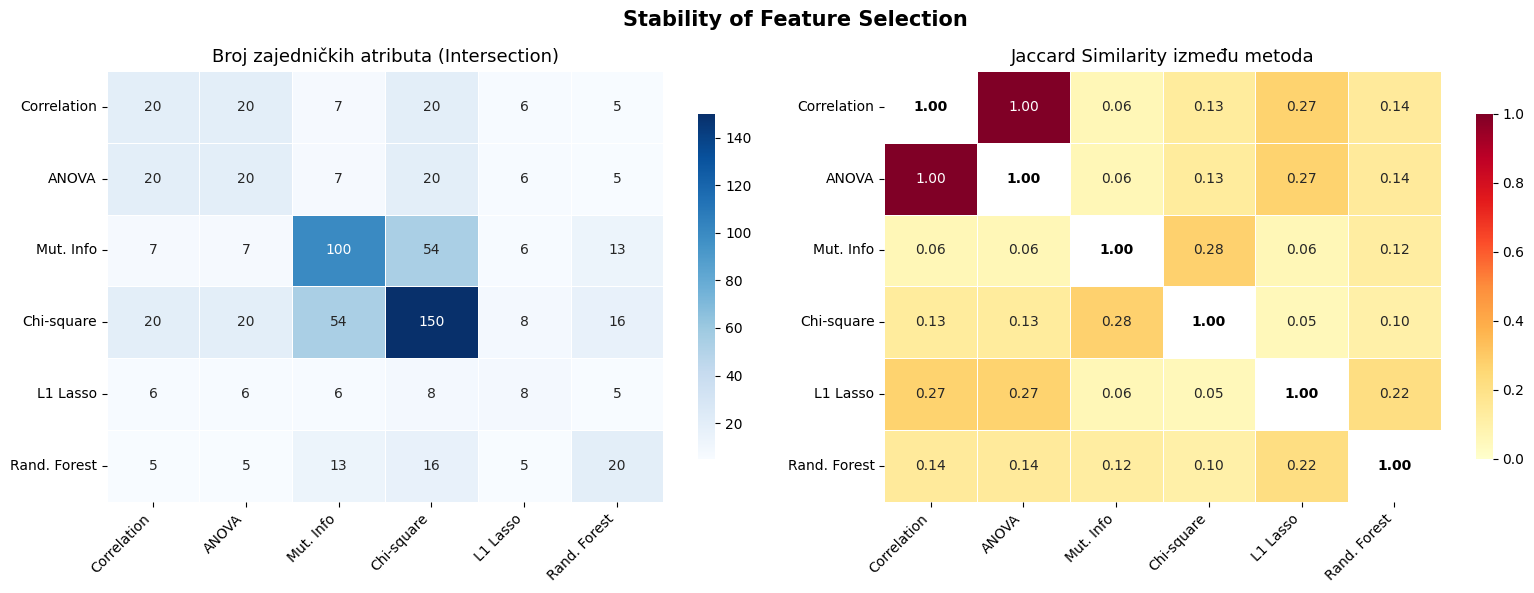

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(
    df_intersection,
    annot=True, fmt='d',
    cmap='Blues',
    linewidths=0.5,
    ax=axes[0],
    cbar_kws={"shrink": 0.8}
)
axes[0].set_title("Broj zajedničkih atributa (Intersection)", fontsize=13)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)

mask = np.eye(n, dtype=bool) 
sns.heatmap(
    df_jaccard,
    annot=True, fmt='.2f',
    cmap='YlOrRd',
    linewidths=0.5,
    ax=axes[1],
    vmin=0, vmax=1,
    mask=mask,
    cbar_kws={"shrink": 0.8}
)

for i in range(n):
    axes[1].text(i + 0.5, i + 0.5, '1.00',
                 ha='center', va='center', fontsize=10,
                 fontweight='bold', color='black')

axes[1].set_title("Jaccard Similarity između metoda", fontsize=13)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

plt.suptitle("Stability of Feature Selection", fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

Correlation i ANOVA biraju identičan skup od 20 atributa (presek = 20, Jaccard = 1.0), što potvrđuje da su ove dve metode ekvivalentne na ovom skupu podataka zbog dominantno linearnih zavisnosti. Mutual Information i Chi-square dele 54 zajednička atributa, dok L1 Lasso, sa samo 8 selektovanih atributa, pokazuje najveću selektivnost i najmanji prekluap sa ostalim metodama.

Jaccard similarity ukazuje na nisku do umerenu podudarnost između različitih pristupa (vrednosti 0.05–0.28), što znači da svaka metoda hvata delimično različitu diskriminativnu 
informaciju. Izuzetak su Correlation i ANOVA sa Jaccard = 1.0, i L1 Lasso koji ima umeren stepen poklapanja sa Correlation/ANOVA (0.27), jer i Lasso implicitno favorizuje 
linearno diskriminativne atribute kroz regularizaciju.

### CORE FEATURES ( ≥ 3 metode)

In [78]:
from collections import Counter

all_selected = []
for feats in method_sets.values():
    all_selected.extend(list(feats))

vote_counts = Counter(all_selected)
vote_df = pd.DataFrame(vote_counts.items(),
                       columns=['Feature', 'Votes']
                      ).sort_values('Votes', ascending=False)

print("\nAtributi selektovani od strane ≥ 3 metode:")
core_features = vote_df[vote_df['Votes'] >= 3]
print(core_features.to_string(index=False))
print(f"\nUkupno 'core' atributa: {len(core_features)}")


Atributi selektovani od strane ≥ 3 metode:
Feature  Votes
    129      6
     59      6
     21      6
    510      6
    124      5
     28      4
    165      4
    316      4
    125      4
     64      4
    300      3
    434      3
    299      3
    164      3
    431      3
    435      3
    160      3
    436      3
    163      3
    430      3
    205      3
    341      3
    295      3
     65      3
     33      3
    519      3
    126      3
    180      3

Ukupno 'core' atributa: 28


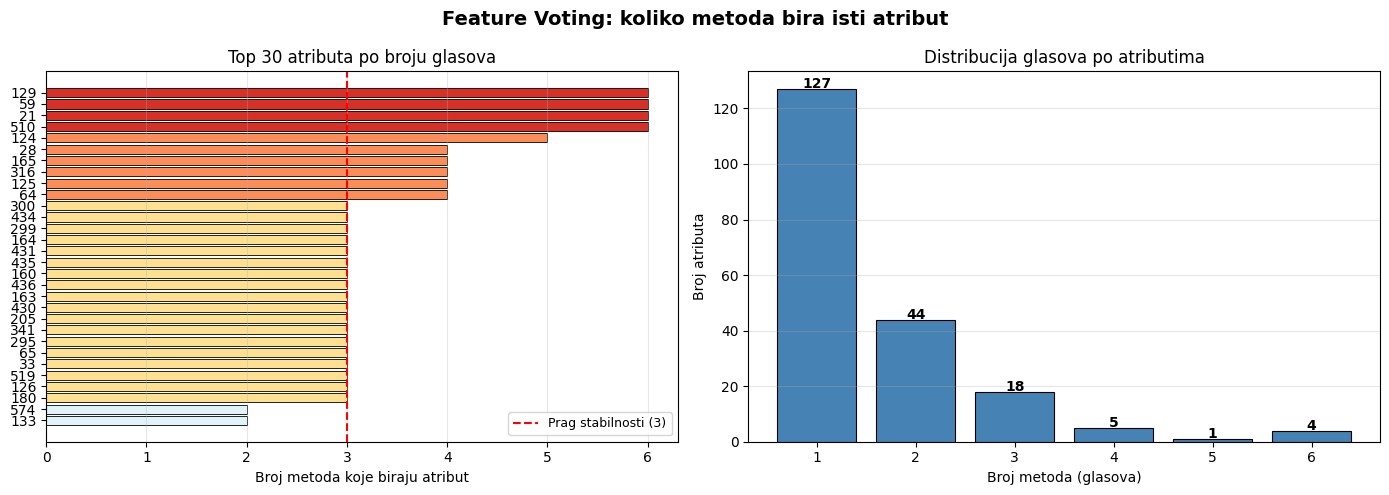

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

top30 = vote_df.head(30)
colors_votes = ['#d73027' if v == n else
                '#fc8d59' if v >= 4 else
                '#fee090' if v == 3 else
                '#e0f3f8'
                for v in top30['Votes']]

axes[0].barh(top30['Feature'].astype(str)[::-1],
             top30['Votes'].values[::-1],
             color=colors_votes[::-1],
             edgecolor='black', linewidth=0.6)
axes[0].axvline(x=3, color='red', linestyle='--',
                linewidth=1.5, label='Prag stabilnosti (3)')
axes[0].set_xlabel("Broj metoda koje biraju atribut")
axes[0].set_title("Top 30 atributa po broju glasova")
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3, axis='x')

# --- Histogram: distribucija glasova ---
vote_counts_hist = vote_df['Votes'].value_counts().sort_index()
axes[1].bar(vote_counts_hist.index, vote_counts_hist.values,
            color='steelblue', edgecolor='black', linewidth=0.8)
axes[1].set_xlabel("Broj metoda (glasova)")
axes[1].set_ylabel("Broj atributa")
axes[1].set_title("Distribucija glasova po atributima")
axes[1].set_xticks(range(1, n + 1))
for x, y_val in zip(vote_counts_hist.index, vote_counts_hist.values):
    axes[1].text(x, y_val + 0.3, str(y_val),
                 ha='center', fontsize=10, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.suptitle("Feature Voting: koliko metoda bira isti atribut",
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Od ukupno 590 atributa, samo 28 je selektovano od strane ≥ 3 metode i smatra se stabilnim. Atributi 21, 129, 59 i 510 dobijaju maksimalnih 6 glasova (sve metode), što ih čini 
najrobustnijim kandidatima za finalni skup obeležja bez obzira na pristup selekcije. Histogram glasova pokazuje da velika većina atributa (127) biva izabrana samo jednom, 
što ukazuje na visoku nestabilnost i međusobnu komplementarnost primenjenih metoda.

# Final model comparison

In [80]:
final_comparison = pd.DataFrame([
    {
        "Model": "Baseline",
        "Metoda": "Sve features (590)",
        "k": 590,
        "ROC-AUC": roc_baseline,
        "AP": ap_baseline,
        "Balanced Acc": bal_acc_baseline
    },
    {
        "Model": "Best Filter",
        "Metoda": "Pearson/ANOVA (k=20)",
        "k": 20,
        "ROC-AUC": results_corr.loc[results_corr["ROC-AUC"].idxmax(), "ROC-AUC"],
        "AP": results_corr.loc[results_corr["ROC-AUC"].idxmax(), "AP"],
        "Balanced Acc": results_corr.loc[results_corr["ROC-AUC"].idxmax(), "Balanced Acc"]
    },
    {
        "Model": "Best Embedded (Regularizacija)",
        "Metoda": "L1 Lasso (C=0.01)",
        "k": 8,
        "ROC-AUC": results_l1.loc[results_l1["ROC-AUC"].idxmax(), "ROC-AUC"],
        "AP": results_l1.loc[results_l1["ROC-AUC"].idxmax(), "AP"],
        "Balanced Acc": results_l1.loc[results_l1["ROC-AUC"].idxmax(), "Balanced Acc"]
    },
    {
        "Model": "Best Tree-based",
        "Metoda": "Random Forest (k=20)",
        "k": 20,
        "ROC-AUC": results_rf.loc[results_rf["ROC-AUC"].idxmax(), "ROC-AUC"],
        "AP": results_rf.loc[results_rf["ROC-AUC"].idxmax(), "AP"],
        "Balanced Acc": results_rf.loc[results_rf["ROC-AUC"].idxmax(), "Balanced Acc"]
    }
])

print(final_comparison.to_string(index=False))

                         Model               Metoda   k  ROC-AUC       AP  Balanced Acc
                      Baseline   Sve features (590) 590 0.658697 0.148850      0.546173
                   Best Filter Pearson/ANOVA (k=20)  20 0.704944 0.158469      0.661034
Best Embedded (Regularizacija)    L1 Lasso (C=0.01)   8 0.713910 0.182441      0.671453
               Best Tree-based Random Forest (k=20)  20 0.724424 0.188414      0.678745


### Hybrid pristup 

In [81]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import  SMOTEENN
from xgboost import XGBClassifier

# XGBoost direktno (ne samo za selekciju)
pipe_xgb_final = ImbPipeline([
    ('imputer',  SimpleImputer(strategy='median')),
    ('variance', VarianceThreshold(threshold=0.01)),
    ('pearson',  PearsonSelector(k=50)),
    ('scaler',   StandardScaler()),
    ('smote',    SMOTEENN(random_state=42)),
    ('model',    XGBClassifier(
                    n_estimators=300,
                    scale_pos_weight=14,
                    max_depth=4,
                    learning_rate=0.05,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    random_state=42,
                    eval_metric='logloss',
                    verbosity=0))
])

roc_xgb_f = cross_val_score(pipe_xgb_final, X, y, cv=cv, scoring='roc_auc').mean()
ap_xgb_f  = cross_val_score(pipe_xgb_final, X, y, cv=cv, scoring='average_precision').mean()
bal_xgb_f = cross_val_score(pipe_xgb_final, X, y, cv=cv, scoring='balanced_accuracy').mean()

print(f"SMOTEENN + Pearson50 + XGBoost")
print(f"  ROC-AUC:       {roc_xgb_f:.4f}")
print(f"  Avg Precision: {ap_xgb_f:.4f}")
print(f"  Balanced Acc:  {bal_xgb_f:.4f}")

SMOTEENN + Pearson50 + XGBoost
  ROC-AUC:       0.7279
  Avg Precision: 0.1557
  Balanced Acc:  0.6602


In [82]:
from sklearn.ensemble import RandomForestClassifier
pipe_rf_final = ImbPipeline([
    ('imputer',  SimpleImputer(strategy='median')),
    ('variance', VarianceThreshold(threshold=0.01)),
    ('pearson',  PearsonSelector(k=50)),
    ('scaler',   StandardScaler()),
    ('smote',    SMOTEENN(random_state=42)),
    ('model',    RandomForestClassifier(
                    n_estimators=300,
                    class_weight='balanced',
                    max_depth=6,
                    min_samples_leaf=2,
                    random_state=42))
])

roc_rf_f = cross_val_score(pipe_rf_final, X, y, cv=cv, scoring='roc_auc').mean()
ap_rf_f  = cross_val_score(pipe_rf_final, X, y, cv=cv, scoring='average_precision').mean()
bal_rf_f = cross_val_score(pipe_rf_final, X, y, cv=cv, scoring='balanced_accuracy').mean()

print(f"SMOTEENN + Pearson50 + Random Forest")
print(f"  ROC-AUC:       {roc_rf_f:.4f}")
print(f"  Avg Precision: {ap_rf_f:.4f}")
print(f"  Balanced Acc:  {bal_rf_f:.4f}")

SMOTEENN + Pearson50 + Random Forest
  ROC-AUC:       0.7222
  Avg Precision: 0.1594
  Balanced Acc:  0.6550


In [83]:

from sklearn.ensemble import GradientBoostingClassifier
pipe_gb_final = ImbPipeline([
    ('imputer',  SimpleImputer(strategy='median')),
    ('variance', VarianceThreshold(threshold=0.01)),
    ('pearson',  PearsonSelector(k=50)),
    ('scaler',   StandardScaler()),
    ('smote',    SMOTEENN(random_state=42)),
    ('model',    GradientBoostingClassifier(
                    n_estimators=200,
                    max_depth=3,
                    learning_rate=0.05,
                    subsample=0.8,
                    random_state=42))
])

roc_gb_f = cross_val_score(pipe_gb_final, X, y, cv=cv, scoring='roc_auc').mean()
ap_gb_f  = cross_val_score(pipe_gb_final, X, y, cv=cv, scoring='average_precision').mean()
bal_gb_f = cross_val_score(pipe_gb_final, X, y, cv=cv, scoring='balanced_accuracy').mean()

print(f"SMOTEENN + Pearson50 + Gradient Boosting")
print(f"  ROC-AUC:       {roc_gb_f:.4f}")
print(f"  Avg Precision: {ap_gb_f:.4f}")
print(f"  Balanced Acc:  {bal_gb_f:.4f}")

SMOTEENN + Pearson50 + Gradient Boosting
  ROC-AUC:       0.7306
  Avg Precision: 0.1611
  Balanced Acc:  0.6279


In [84]:

final_all = pd.DataFrame([
    {"Model": "Baseline",              "ROC-AUC": roc_baseline, 
     "AP": ap_baseline,                "Balanced Acc": bal_acc_baseline},
    {"Model": "Best Filter\n(Pearson k=20)",   
     "ROC-AUC": results_corr["ROC-AUC"].max(),
     "AP": results_corr.loc[results_corr["ROC-AUC"].idxmax(), "AP"],
     "Balanced Acc": results_corr.loc[results_corr["ROC-AUC"].idxmax(), "Balanced Acc"]},
    {"Model": "Best Embedded\n(L1 C=0.01)",    
     "ROC-AUC": results_l1["ROC-AUC"].max(),
     "AP": results_l1.loc[results_l1["ROC-AUC"].idxmax(), "AP"],
     "Balanced Acc": results_l1.loc[results_l1["ROC-AUC"].idxmax(), "Balanced Acc"]},
    {"Model": "Best Tree\n(RF k=20)",  
     "ROC-AUC": results_rf["ROC-AUC"].max(),
     "AP": results_rf.loc[results_rf["ROC-AUC"].idxmax(), "AP"],
     "Balanced Acc": results_rf.loc[results_rf["ROC-AUC"].idxmax(), "Balanced Acc"]},
    {"Model": "SMOTEENN\n+P50+XGB",    
     "ROC-AUC": roc_xgb_f, "AP": ap_xgb_f, "Balanced Acc": bal_xgb_f},
    {"Model": "SMOTEENN\n+P50+RF",     
     "ROC-AUC": roc_rf_f,  "AP": ap_rf_f,  "Balanced Acc": bal_rf_f},
    {"Model": "SMOTEENN\n+P50+GBM",    
     "ROC-AUC": roc_gb_f,  "AP": ap_gb_f,  "Balanced Acc": bal_gb_f},
])

print(final_all.to_string(index=False))
best_idx = final_all["ROC-AUC"].idxmax()
print(f"\nNajbolji model: {final_all.loc[best_idx, 'Model'].replace(chr(10), ' ')}")
print(f"ROC-AUC:      {final_all.loc[best_idx, 'ROC-AUC']:.4f}")
print(f"Balanced Acc: {final_all.loc[best_idx, 'Balanced Acc']:.4f}")

                      Model  ROC-AUC       AP  Balanced Acc
                   Baseline 0.658697 0.148850      0.546173
Best Filter\n(Pearson k=20) 0.704944 0.158469      0.661034
 Best Embedded\n(L1 C=0.01) 0.713910 0.182441      0.671453
       Best Tree\n(RF k=20) 0.724424 0.188414      0.678745
         SMOTEENN\n+P50+XGB 0.727933 0.155711      0.660172
          SMOTEENN\n+P50+RF 0.722213 0.159425      0.654963
         SMOTEENN\n+P50+GBM 0.730578 0.161142      0.627877

Najbolji model: SMOTEENN +P50+GBM
ROC-AUC:      0.7306
Balanced Acc: 0.6279


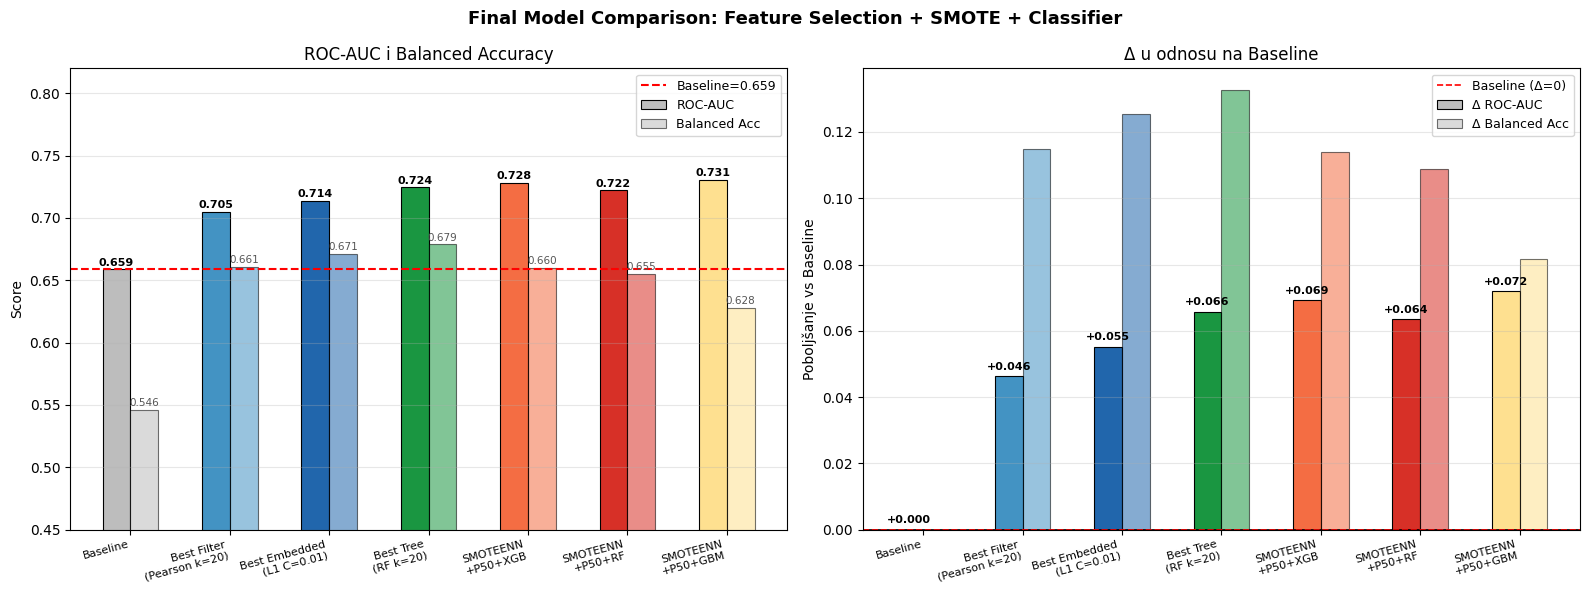

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

x      = np.arange(len(final_all))
width  = 0.28
colors = ['#bdbdbd','#4393c3','#2166ac','#1a9641',
          '#f46d43','#d73027','#fee090']

# ROC-AUC + BA
b1 = axes[0].bar(x - width/2, final_all["ROC-AUC"],
                 width, color=colors,
                 edgecolor='black', linewidth=0.8, label='ROC-AUC')
b2 = axes[0].bar(x + width/2, final_all["Balanced Acc"],
                 width, color=colors, alpha=0.55,
                 edgecolor='black', linewidth=0.8, label='Balanced Acc')

axes[0].axhline(y=roc_baseline, color='red', linestyle='--',
                linewidth=1.5, label=f'Baseline={roc_baseline:.3f}')

for bar in b1:
    axes[0].text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() + 0.003,
                 f'{bar.get_height():.3f}',
                 ha='center', fontsize=8, fontweight='bold')
for bar in b2:
    axes[0].text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() + 0.003,
                 f'{bar.get_height():.3f}',
                 ha='center', fontsize=7.5, color='#555555')

axes[0].set_xticks(x)
axes[0].set_xticklabels(final_all["Model"], fontsize=8, rotation=15, ha='right')
axes[0].set_ylim(0.45, 0.82)
axes[0].set_ylabel("Score")
axes[0].set_title("ROC-AUC i Balanced Accuracy", fontsize=12)
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3, axis='y')


delta_roc = final_all["ROC-AUC"] - roc_baseline
delta_bal = final_all["Balanced Acc"] - bal_acc_baseline

b3 = axes[1].bar(x - width/2, delta_roc,
                 width, color=colors,
                 edgecolor='black', linewidth=0.8, label='Δ ROC-AUC')
b4 = axes[1].bar(x + width/2, delta_bal,
                 width, color=colors, alpha=0.55,
                 edgecolor='black', linewidth=0.8, label='Δ Balanced Acc')

axes[1].axhline(y=0, color='black', linewidth=1.2)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=1.2,
                label='Baseline (Δ=0)')

for bar in b3:
    val = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2,
                 val + 0.002 if val >= 0 else val - 0.008,
                 f'{val:+.3f}',
                 ha='center', fontsize=8, fontweight='bold')

axes[1].set_xticks(x)
axes[1].set_xticklabels(final_all["Model"], fontsize=8, rotation=15, ha='right')
axes[1].set_ylabel("Poboljšanje vs Baseline")
axes[1].set_title("Δ u odnosu na Baseline", fontsize=12)
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3, axis='y')

plt.suptitle("Final Model Comparison: Feature Selection + SMOTE + Classifier",
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

Grafik prikazuje poređenje performansi različitih kombinacija selekcije atributa, balansiranja klasa i klasifikatora u odnosu na baseline model. Vidljivo je da primena selekcije atributa značajno poboljšava ROC-AUC i Balanced Accuracy, dok dodatna primena SMOTEENN tehnike daje dodatno povećanje performansi kod određenih modela

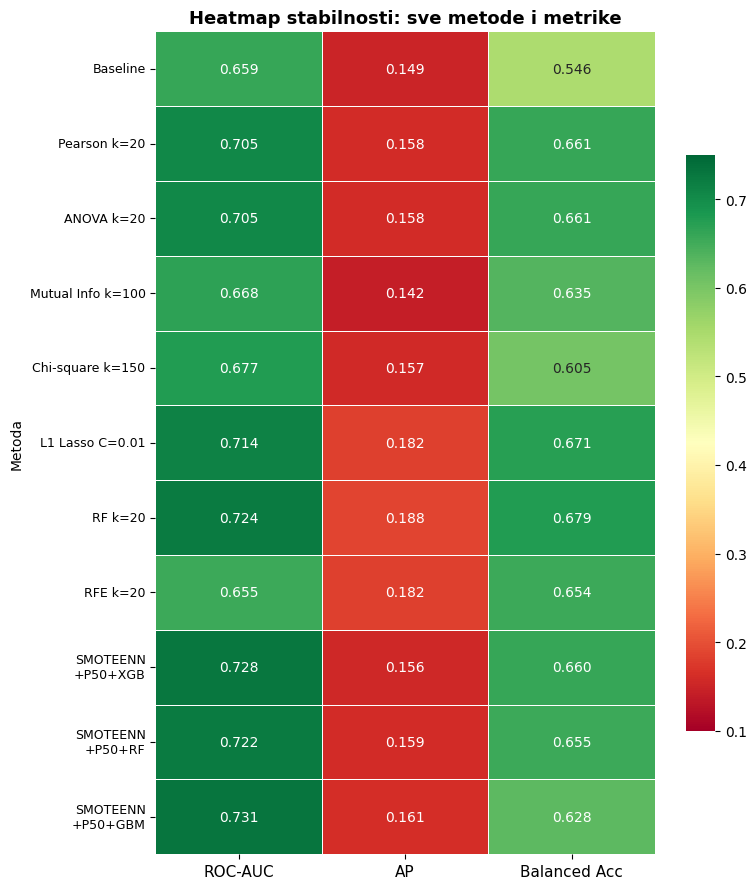

In [86]:
# HEATMAP STABILNOSTI

stability_data = pd.DataFrame([
    {"Metoda": "Baseline",           "ROC-AUC": roc_baseline,
     "AP": ap_baseline,              "Balanced Acc": bal_acc_baseline, "k": 590},
    {"Metoda": "Pearson k=20",       "ROC-AUC": results_corr.loc[0,"ROC-AUC"],
     "AP": results_corr.loc[0,"AP"], "Balanced Acc": results_corr.loc[0,"Balanced Acc"], "k": 20},
    {"Metoda": "ANOVA k=20",         "ROC-AUC": results_anova.loc[0,"ROC-AUC"],
     "AP": results_anova.loc[0,"AP"],"Balanced Acc": results_anova.loc[0,"Balanced Acc"], "k": 20},
    {"Metoda": "Mutual Info k=100",  "ROC-AUC": results_mi.loc[2,"ROC-AUC"],
     "AP": results_mi.loc[2,"AP"],   "Balanced Acc": results_mi.loc[2,"Balanced Acc"], "k": 100},
    {"Metoda": "Chi-square k=150",   "ROC-AUC": results_chi2.loc[3,"ROC-AUC"],
     "AP": results_chi2.loc[3,"AP"], "Balanced Acc": results_chi2.loc[3,"Balanced Acc"], "k": 150},
    {"Metoda": "L1 Lasso C=0.01",    "ROC-AUC": results_l1.loc[0,"ROC-AUC"],
     "AP": results_l1.loc[0,"AP"],   "Balanced Acc": results_l1.loc[0,"Balanced Acc"], "k": 8},
    {"Metoda": "RF k=20",            "ROC-AUC": results_rf.loc[0,"ROC-AUC"],
     "AP": results_rf.loc[0,"AP"],   "Balanced Acc": results_rf.loc[0,"Balanced Acc"], "k": 20},
    {"Metoda": "RFE k=20",           "ROC-AUC": results_rfe.loc[0,"ROC-AUC"],
     "AP": results_rfe.loc[0,"AP"],  "Balanced Acc": results_rfe.loc[0,"Balanced Acc"], "k": 20},
    {"Metoda": "SMOTEENN\n+P50+XGB", "ROC-AUC": roc_xgb_f,
     "AP": ap_xgb_f,                 "Balanced Acc": bal_xgb_f, "k": 50},
    {"Metoda": "SMOTEENN\n+P50+RF",  "ROC-AUC": roc_rf_f,
     "AP": ap_rf_f,                  "Balanced Acc": bal_rf_f, "k": 50},
    {"Metoda": "SMOTEENN\n+P50+GBM", "ROC-AUC": roc_gb_f,
     "AP": ap_gb_f,                  "Balanced Acc": bal_gb_f, "k": 50},
]).set_index("Metoda")

plt.figure(figsize=(8, 9))
sns.heatmap(
    stability_data[["ROC-AUC", "AP", "Balanced Acc"]],
    annot=True, fmt=".3f",
    cmap="RdYlGn",
    vmin=0.10, vmax=0.75,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7}
)
plt.title("Heatmap stabilnosti: sve metode i metrike", fontsize=13, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=9, rotation=0)
plt.tight_layout()
plt.show()

Heatmap prikazuje komparativne vrednosti ROC-AUC, Average Precision i Balanced Accuracy za sve primenjene metode selekcije atributa. Može se uočiti da metode zasnovane na regularizaciji i ansambl pristupu (L1, Random Forest) postižu stabilnije i više vrednosti u odnosu na pojedine filter metode.

In [88]:
final_table = stability_data.copy()
final_table["Δ ROC-AUC"] = (final_table["ROC-AUC"] - roc_baseline).round(4)
final_table["k"] = final_table["k"].astype(int)
final_table = final_table.sort_values("ROC-AUC", ascending=False)

# Highlight najboljeg
best_model = final_table["ROC-AUC"].idxmax()

print("=" * 65)
print(f"{'FINALNA TABELA: POREĐENJE SVIH METODA':^65}")
print("=" * 65)
print(final_table[["k", "ROC-AUC", "AP", "Balanced Acc", "Δ ROC-AUC"]].to_string())
print("=" * 65)
print(f" NAJBOLJI MODEL: {best_model}")
print(f"   ROC-AUC:        {final_table.loc[best_model, 'ROC-AUC']:.4f}")
print(f"   Avg Precision:  {final_table.loc[best_model, 'AP']:.4f}")
print(f"   Balanced Acc:   {final_table.loc[best_model, 'Balanced Acc']:.4f}")
print(f"   Poboljšanje:    {final_table.loc[best_model, 'Δ ROC-AUC']:+.4f} vs Baseline")
print("=" * 65)

              FINALNA TABELA: POREĐENJE SVIH METODA              
                      k   ROC-AUC        AP  Balanced Acc  Δ ROC-AUC
Metoda                                                              
SMOTEENN\n+P50+GBM   50  0.730578  0.161142      0.627877     0.0719
SMOTEENN\n+P50+XGB   50  0.727933  0.155711      0.660172     0.0692
RF k=20              20  0.724424  0.188414      0.678745     0.0657
SMOTEENN\n+P50+RF    50  0.722213  0.159425      0.654963     0.0635
L1 Lasso C=0.01       8  0.713910  0.182441      0.671453     0.0552
Pearson k=20         20  0.704944  0.158469      0.661034     0.0462
ANOVA k=20           20  0.704944  0.158469      0.661034     0.0462
Chi-square k=150    150  0.677411  0.157389      0.605019     0.0187
Mutual Info k=100   100  0.668286  0.142171      0.635373     0.0096
Baseline            590  0.658697  0.148850      0.546173     0.0000
RFE k=20             20  0.655064  0.181661      0.653561    -0.0036
 NAJBOLJI MODEL: SMOTEENN
+P50+GBM
  

Finalna tabela sumira performanse svih analiziranih metoda i prikazuje poboljšanje u odnosu na baseline model. Najbolji rezultat ostvaren je kombinacijom SMOTEENN balansiranja, Pearson selekcije (k=50) i Gradient Boosting modela, sa ROC-AUC = 0.7306, što predstavlja poboljšanje od +0.0719 u odnosu na početni model.

# Zaključak

Sprovedena analiza pokazuje da selekcija atributa ima ključnu ulogu u unapređenju performansi modela na visoko-dimenzionalnom i izrazito nebalansiranom SECOM skupu podataka. Redukcijom sa 590 atributa na znatno manji broj informativnih obeležja postignuto je značajno poboljšanje ROC-AUC i Balanced Accuracy u odnosu na baseline model, uz istovremeno smanjenje kompleksnosti i rizika od prenaučavanja.

Metode zasnovane na regularizaciji (L1) i ansambl pristupu (Random Forest, Gradient Boosting) pokazale su veću stabilnost i robusnost u poređenju sa pojedinim klasičnim filter metodama. Dodatno, kombinacija selekcije atributa i tehnika balansiranja klasa (SMOTEENN) omogućila je ostvarivanje najboljih ukupnih performansi modela.

Rezultati potvrđuju da pažljivo odabrana strategija selekcije atributa, u kombinaciji sa odgovarajućim klasifikatorom i obradom nebalansiranosti, predstavlja presudan korak u izgradnji efikasnih i stabilnih modela mašinskog učenja.